<a href="https://colab.research.google.com/github/davidklhui/stochastic-modelling/blob/main/Stochastic_Simulations_Spin_Poker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**author**: David, K.L. Hui

This project will demonstrate a simulation study of Spin Poker, a variant of slot machine in common casino. We will discuss how to simulate, game reward design strategy, and further statistical quantities of interest.


<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=1Ja0zvDtZ0_f_XvLhmNRibnM6NOvqo2HG' width='400'/>
<figcaption>Disclaimer: I do not own these images, I capture this from Google Images</figcaption></center>
</figure>

# Section 1: Introduction





## Background

Slot machine, or 777 game, is a very famous game in casino. The gambler will insert credits or coins to the machine and pull to spin the reels. Traditionally, there are 3 reels in the machine, and each reel have different outcomes. If the outcomes of those 3 reels satisfied some specific pattern (e.g. 3 fruits of the same kind, or 7-7-7), then the gambler will retrieve credits as rewards.

The **Spin Poker** on the other hand, is an variant type of this classic game. This game will have 5 reels with different poker cards. If the outcome of the reels form a specific poker pattern, e.g.: **straight**: 5 consecutive numbers
or **flush**: 5 same suits, then the player will get rewards.



## Objective

To design a game, what we wish is to gain money. However if the game is clearly unfair, then no gambler would play this game. So to design a "attractive game", we need to set it **slighly unfair**, and attract the gambler to stay.

1. Mathematically, suppose each game costs 1 coin, if the expected gain of the gambler per game has just 0.999 coins for example, then in the long run the gambler will ruin.

2. Gambler behavior: it is common that some gambler will leave after consecutive loss, or if they have won a large prize. Also, the reward amount will be another factor whether to play or not.

In this project, we will go through some "very basic gambler's behavior", and find a method to get the **optimal reward allocation strategy** to maximize the mean length (duration) of game by the gambler

<br/>


p.s. For the real world scenario, we can analyze the gambler behavior by analyzing the actual dataset of gamblers' game play history



## Prerequisites

This project required the following mathematics, statistics and computing knowledge, although large portion are simply using programming and simulation:

1. Probability
   - permutations and combinations
   - expectation
2. Optimization
   - Integer programming
3. Computing
   - Python

## Contents of this project

In this section 1, we discussed the background and objective of this project, and then some prerequisites knowledge (although it is not necessary because most of them are programming and simulation).
<br/>
In section 2, we will go through some terminology in simple poker and slot machine.
<br/>
Section 3 to 5 are the center of this project. In section 3, we will formulate the problem using mathematical notations. In section 4, we will breakdown the whole problem into several subsections, so that we can understand each part step by step. Then in section 5, we will integrate them together, make the whole program neater and in a more maintainable format.
<br/>
In section 6, we will briefly go through some ways of improvement. And finaly in section 7, it will be the conclusion section, and some references that I have used in this project

# Section 2: Terminology




## Standard Deck



a standard deck has 52 cards, in which there are 4 suits and 13 ranks: <br/>

**Suits** are Spades ♠, Hearts ♥, Clubs ♣, and Diamonds ♦ <br/>
**Ranks** are A,2,3,...,10,J,Q,K.

Where we refer A as Ace, J as Jack , Q as Jack, K as King



## Outcome




I will use **position** to represent the traditional position of reel.
e.g. position1 be the leftmost reel, position2 be the second, ..., position5 be the rightmost.

An **result of a position**, be the display card of the position after a spin.

A **outcome** is the results of the 5 positions



### Example

after spin or shuffle, the screen displays (from left to right): <br/>
♠5, ♠3, ♠7, ♣4, ♦6

then,

the result of position1 is ♠5, ..., the result of position5 ♦6.

The outcome is ♠5, ♠3, ♠7, ♣4, ♦6


## Patterns

A **pattern** be the specific combination determined by the outcome.


We used the traditional name of the patterns, with slight variation:

We will use the followings only:
1. one-pair
  - 2 cards have the same rank, the rest of 3 have different ranks
  - ♠A, ♦A, ♣3, ♣4, ♠5
2. two-pairs
  - there exists two one-pair, plus an additional rank
  - ♠A, ♦A, ♣3, ♣3, ♠8
3. three-of-a-kind
  - there are 3 cards with the same rank, plus 2 different ranks
  - ♠A, ♦A, ♣A, ♣4, ♠5
4. four-of-a-kind
  - there are 4 cards with the same rank, plus 1 different rank
  - ♠A, ♦A, ♣A, ♣A, ♠5
5. five-of-a-kind
  - five cards are with the same rank
  - ♠A, ♦A, ♣A, ♣A, ♠A
6. full-house
  - 3 cards with the same rank, plus the remaining 2 cards with the same ranks (but different from those 3)
  - ♠A, ♦A, ♣A, ♣5, ♠5
7. straight
  - the ranks form a consecutive rank
  - if involved an Ace, then both A2345 and 10JQKA are included
  - ♠A, ♦4, ♣5, ♣3, ♠2
8. flush
  - all five cards are with the same suit
  - ♠J, ♠2, ♠3, ♠7, ♠K



Note that five-of-a-kind is not a traditional pattern in any standard poker game. We define it here because our game design will have this pattern

And also note that, because each position are a standard deck, so it is possible that all five position give the same result, while traditional poker game will always have different 5 cards

## Game Play



a **play**, is the game played by the gambler.

To play a game, the gambler needs to insert **coins** or **credits**, which is the **cost**

If the outcome forms a pattern, then the gambler will get **reward**

We define the terms **gain** be the **reward** - **cost**


## Series of game play

**Length of a game**, or the **length** for short (also known as the **duration** of the game), is the total game played by the gambler.

**step i** is the $\text{i}^{th}$ game play throught the series of game.

**total capital**, or simply **capital** (also known as balance), is the total coins or credits the gambler at hand.

**trace of a game**, or the **trace** is the history of captials at different **step** (trace will include the initial capital)

### Example

Suppose the game cost is 10 credits each play, the gambler initially have 100 credits, and loss twice, then rewarded 120, then a loss, and finally the gambler leave.

Then,

the length of the game is 4

the trace of the game is [100, 90 (100-10), 80 (90-10), 190 (80-70+120), 180]

the capital at step 2 is 80

# Section 3: Problem Formulation



Recall that our goals are: <br/>
A: ensure the gambler loss money in a long run (negative expected gain) <br/>
B: maximize the average game plays by any gamblers

So, we can ensure to earn money from the gambler, and we can lead the gambler stay as long as possible.

## A: ensure the gambler loss money in a long run

Suppose that the certain game has K different classes, denoted $C_1$, $C_2$, ...$C_K$, where the probability of getting respective class is $p_i$ for $i=1,2,...,K$. And also the classes are ordered according to the probabiilties, i.e. $p_1 < p_2 < ... < p_K$

Denote $X$ be the class of a randomly chosen class among the K classes, then

$$
P(X \ \text{is} \ C_k) = p_k
$$
where $\sum_{i=1}^K p_i$ = 1



Suppose $R$ (a random variable) be the reward of a game .

Let $r_i \in \mathbb{Z}^+$ (fixed unknown constant) be the reward if matched the class $C_i$ for $i=1,2,...,K$, then the expected reward of the game is

$$
E(R) = \sum_{i=1}^K r_i p_i
$$

let also the cost = $C \in \mathbb{Z}^+$, and the gain of the game is $G = R - C$, then

$$
E(G) = E(R) - E(C) = \sum_{i=1}^K r_i p_i - C
$$

**Our aim is to find how to allocate $r_i$**

To find a possible way to allocate $r_i's$, we may also define the maximum allowable expected gain by the gambler, say M, i.e. we need $E(G) < M$.

In addition, we can also supply another set of coefficients $a_1, a_2, ..., a_{K-1}$, such that, to ensure the rewards are different (and to ensure they will differs a lot, we will show in example that, the solution will be quite unusable if $a_i$'s are all 1):
\begin{align}
a_1 r_1 &\lt r_2 \\
a_2 r_2 &\lt r_3 \\
&... \\
a_{K-1} r_{K-1} &\lt r_K
\end{align}

For further restrictions, we can make the minimum reward be L, maximum reward be U:

$$
L \le r_1, r_K \le U
$$

Let f be the objective function, which is also the expected gain:

\begin{align}
f(r_1,r_2,...,r_K; p_1, p_2, ..., p_K, C) &= p_1 r_1 + p_2 r_2 + ... + p_K r_K - C \\
              &= \underline{p}^T \underline{r} - C
\end{align}

Then the IP problem can be formulated as:

\begin{align}
\text{objective} \ & \max_{r_1,...,r_K} f(\underline{r}; \underline{p}, C)\\
\text{subject to} \ & L \le r_1 \\
\text{and} \ & a_1 r_1 \lt r_2 \\
\text{and} \ & a_2 r_2 \lt r_3 \\
\text{and} \ & ... \\
\text{and} \ & a_{K-1} r_{K-1} \lt r_K \\
\text{and} \ & r_K \le U \\
\text{and} \ & f < M \\
\text{and} \ & r_k \in \mathbb{Z}^+ \ \text{for} \ k = 1, 2, ..., K\\
\end{align}

Suppose the solution exists, then, **provided a coefficient array $\underline{a}$**, then we will get a solution of the IP problem. This solution, say $\underline{r}^* = (r_1^*, ..., r_K^*)^T$ is the possible reward allocation.

The above IP problem can give us a systematic way to allocate rewards in such a way that, rewards are integer and the gambler's expected gain is maximized (and negative by setting $M$ < 0). This satisfied our goal A.

Next, is to find a way to satisfy goal B: maximize the average game plays.

## B: maximize the average game plays by any gamblers

Suppose that the gambler plays a series of game, but they will have some considerations about the game experience (e.g. the game play history)

Then, the gambler's capital $Y_n $on hand after game $n$ will be a stochastic process {$Y_n; n \ge 0$}

Let the number of game plays by the gambler is $N$, a random variable.
N is also depends on the reward allocation $(r_1, r_2, ..., r_K)$, initial capital y, gamblers' historical capitals $(Y_1, Y_2, ...Y_{N-1})$, and some further information about the gambler behavior (we will discuss some basic behavior)

Our problem is to find how $\underline{r}$ to maximize $E(N)$. However, to find an allocation of $\underline{r}$, it depends on the coefficient array $\underline{a}$, which is difficult to find explicitly.

So, we use trial-and-error approach to find a possible coefficient array $\underline{a}$ and the respective $E(N)$.

The algorithm is:

$\quad$STEP1: for j=1,2,...,J: <br/>
$\quad\quad$STEP2: generate a random array $\underline{a}^{(j)}$ of size K, where $a_k \sim U(u_{min}, u_{max})$ <br/>
$\quad\quad$STEP3: use $\underline{a}^{(j)}$ to solve the IP problem to get $\underline{r}^{*(j)}$ <br/>
$\quad\quad$STEP4: using $\underline{r}^{*(j)}$, simulate M game plays processes: <br/>
$\quad\quad\quad$STEP 4.1: let n=1 <br/>
$\quad\quad\quad$STEP 4.2: game play <br/>
$\quad\quad\quad$STEP 4.3: if the gambler choose to stay, n = n+1, go to STEP 4.2, else return $n$, go to STEP5 <br/>
$\quad\quad$STEP5: collected a size M array of game plays length, calculate the average length $N_j$ <br/>
$\quad\quad$STPE6:return ($N_j$, $\underline{r}^{*(j)}$) <br/>
$\quad\quad$STEP7: repeat STEP2 to STEP6 <br/>
$\quad$STEP8: find the maximum average length $N_j$ among these J samples, and report the allocation $\underline{r}^{*(j)}$



# Section 4: Breakdown the problem

This section involves a few parts of basic analysis:
1. define **Card** class, and how to simulate an outcome
2. define **pattern** function to identify the pattern of an outcome
3. find the probability distribution of different patterns through simulation
4. (*optional to read) the true probability distribution
5. discuss the reward allocation strategy based on expected gain and optimization problems
6. discuss some basic gambler's behavior and how it would affect the average length of game
7. find the optimal reward allocation strategy to maximize the average length of game play based on gambler's behavior

## Define Card class and outcomes

In [ ]:
# possible ranks
ranks = [i for i in range(1, 14)]
print("ranks:", ranks)

# possible suits
suits = ['S', 'H', 'C', 'D']
print("suits:", suits)


# possible indices
from itertools import product
all_indices = range(len(list(product(suits, ranks))))
print("all indices: ", all_indices)

def map_index_to_card(index):
  return list(product(suits, ranks))[index]


ranks: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
suits: ['S', 'H', 'C', 'D']
all indices:  range(0, 52)


In [ ]:
# index is 0 based, S_A <-> 0; S2 <-> 1; ..., S_K <-> 12; H_A <-> 13, ..., D_K <-> 51

print(map_index_to_card(0))
print(map_index_to_card(1))
print(map_index_to_card(13))
print(map_index_to_card(51))



('S', 1)
('S', 2)
('H', 1)
('D', 13)


In [ ]:

# define a card
class Card:
  def __init__(self, suit, rank):
    self.suit = suit
    self.rank = rank

  @classmethod
  def from_index(cls, index):
    suit, rank = map_index_to_card(index)
    return cls(suit, rank)

  def number_name(self):

    if self.rank==1:
      return 'A'
    elif self.rank==11:
      return 'J'
    elif self.rank==12:
      return 'Q'
    elif self.rank==13:
      return 'K'
    else:
      return str(self.rank)

  def suit_name(self):
    if self.suit=='S':
      return '♠'
    elif self.suit=='H':
      return '♥'
    elif self.suit=='C':
      return '♣'
    else:
      return '♦'

  def description(self):
    return f"{self.suit_name()}{self.number_name()}"

  def __repr__(self):
    return self.description()



In [ ]:
# try some:
spade_2 = Card('S', 2)
print(spade_2)

club_k = Card('C', 13)
print(club_k)

diamond_ace = Card('D', 1)
print(diamond_ace)

♠2
♣K
♦A


In [ ]:
print(Card.from_index(3))

print(Card.from_index(38))

print(Card.from_index(39))



♠4
♣K
♦A


In [ ]:
# a way to simulate multiple outcomes, e.g., 10

# use numpy library to perform random choosing
import numpy as np


random_arrays = np.random.choice(all_indices, size=(10, 5), replace=True)

random_arrays

array([[29,  2, 51, 13, 49],
       [47, 17, 46, 27,  2],
       [22,  2, 18, 18, 48],
       [36, 16,  8, 45, 17],
       [28,  8, 24, 11, 34],
       [51, 50, 27, 51, 21],
       [49, 14, 51, 43, 19],
       [28, 18,  0,  9, 28],
       [ 7, 20, 23, 35, 26],
       [34, 34, 37, 39, 48]])

In [ ]:

# suppose 5 positions, each position give one card from a standard poker deck
# but for generation, it is allowed to accept different "decks" like some position may contains 30 cards, but some 60 cards with replications, which are indices array ranging from 0 to 51 inclusively
# and the outcomes are the 2d array as above
class spin_poker:

  max_out = 5

  def __init__(self, *args):

    # defined there are max_out=5 of slots. If we input 3 args to instantiate the class,
    # then the first 3 will be the custom input decks; the rest 2 will be the default deck
    slots_deck = [self.default_deck()] * self.max_out

    for idx, arg in enumerate(args):
      if idx < self.max_out and (arg is not None and len(arg) > 0):
        slots_deck[idx] = arg

    self.slots_deck = slots_deck

  # define how to get a default deck: using cartesian product of numbers and suits
  def default_deck(self):
    return all_indices

  def generate_n(self, N):
    # for each position, generate N times
    # then transpose it
    outcomes = [np.random.choice(self.slots_deck[i], size=N, replace=True) for i in range(5)]
    return np.transpose(outcomes)

  # use to simulate an outcome
  def generate(self):
    return self.generate_n(1).squeeze()





In [ ]:
# sample of generated result, which is an array of Card
sample_1 = spin_poker().generate()

# print the Card array
print(sample_1)


[34 44 24 13 16]


In [ ]:
# generate multiple samples, which is an array of array of Card
samples_n = spin_poker().generate_n(10)

for sample in samples_n:
  print([f"{Card.from_index(index).description()}({index})" for index in sample])



['♣Q(37)', '♣6(31)', '♥10(22)', '♦10(48)', '♦2(40)']
['♦7(45)', '♥5(17)', '♦5(43)', '♦7(45)', '♦2(40)']
['♥3(15)', '♦A(39)', '♣Q(37)', '♥7(19)', '♣2(27)']
['♦9(47)', '♠J(10)', '♠A(0)', '♣9(34)', '♥10(22)']
['♠J(10)', '♦10(48)', '♠6(5)', '♦7(45)', '♦3(41)']
['♣3(28)', '♣6(31)', '♥A(13)', '♥Q(24)', '♥7(19)']
['♥3(15)', '♥Q(24)', '♠J(10)', '♦Q(50)', '♣9(34)']
['♣4(29)', '♣Q(37)', '♣K(38)', '♥4(16)', '♦7(45)']
['♠9(8)', '♣Q(37)', '♥Q(24)', '♦3(41)', '♥J(23)']
['♥9(21)', '♠10(9)', '♥3(15)', '♠9(8)', '♠4(3)']


In [ ]:
# an example of non-standard decks, but we will not use it in this project
# but this will be useful for further experiments, like how to controls the decks may affect the outcome probabilities
position1 = np.arange(13, dtype=int)
position2 = np.arange(14, 26, dtype=int)
position3 = np.arange(27, 52, dtype=int)
position4 = np.arange(52, step=2, dtype=int)
position5 = np.tile(all_indices, reps=2)

samples_n = spin_poker(position1, position2, position3, position4, position5).generate_n(10)


for sample in samples_n:
  # so the first postion will always be Spade
  # second will always Heart
  # third will be Club and Diamond
  # forth only even index
  # fifth have 2 standard decks
  print([f"{Card.from_index(index).description()}({index})" for index in sample])


['♠5(4)', '♥2(14)', '♦7(45)', '♣J(36)', '♥4(16)']
['♠K(12)', '♥4(16)', '♦A(39)', '♠A(0)', '♦6(44)']
['♠3(2)', '♥K(25)', '♣9(34)', '♣5(30)', '♣4(29)']
['♠7(6)', '♥10(22)', '♣5(30)', '♣3(28)', '♦5(43)']
['♠4(3)', '♥5(17)', '♦6(44)', '♦6(44)', '♦Q(50)']
['♠7(6)', '♥6(18)', '♦5(43)', '♦2(40)', '♦Q(50)']
['♠6(5)', '♥9(21)', '♣Q(37)', '♦6(44)', '♥Q(24)']
['♠J(10)', '♥4(16)', '♦4(42)', '♥4(16)', '♣5(30)']
['♠J(10)', '♥4(16)', '♦6(44)', '♠K(12)', '♠10(9)']
['♠2(1)', '♥7(19)', '♣8(33)', '♦2(40)', '♥J(23)']


## Define pattern function

Suppose we only give reward if the outcomes matched a specific patterns.

\\

p.s: we should note that, it is possible that flush is also one-pair, so in this case we should count the prize twice.
Also in our setup, full houses can also be flush.
However, two-pairs will not count twice of one-pair


In [ ]:
# define a few samples
one_pair = [Card('S', 1), Card('S', 1), Card('S', 2), Card('S', 8), Card('H', 9)]
two_pairs = [Card('S', 1), Card('S', 1), Card('S', 2), Card('D', 2), Card('H', 9)]
straight = [Card('S', 1), Card('S', 2), Card('S', 3), Card('D', 5), Card('H', 4)]
flush = [Card('H', 1), Card('H', 5), Card('H', 2), Card('H', 13), Card('H', 12)]
full_hourses = [Card('H', 1), Card('H', 2), Card('H', 3), Card('H', 4), Card('H', 5)]
three_kind = [Card('H', 1), Card('H', 1), Card('D', 1), Card('H', 4), Card('H', 5)]
four_kind = [Card('H', 1), Card('H', 1), Card('H', 1), Card('H', 4), Card('H', 1)]
five_kind = [Card('H', 1), Card('H', 1), Card('H', 1), Card('H', 1), Card('H', 1)]
straight_flush = [Card('H', 1), Card('H', 2), Card('H', 3), Card('H', 4), Card('H', 5)]


others = [Card('S', 1), Card('S', 2), Card('S', 13), Card('S', 8), Card('H', 9)]



In [ ]:
for p in one_pair:
  print(p)


♠A
♠A
♠2
♠8
♥9


In [ ]:
# import some handy class for counting
# here I used the actual card to determine
# however for faster computations, use the index and perform modulo is much faster
from collections import Counter


def is_flush(slots):
  suits = [card.suit for card in slots]
  suit_counts = Counter(suits)
  return sorted(list(suit_counts.values())) == [5]

# from the slots (outcomes), an array of size 5
# one pair only calculate the ranks, independent of suits
# e.g. 2,2,3,4,5
def is_one_pair(slots):
  ranks = [card.rank for card in slots]
  rank_counts = Counter(ranks)
  return sorted(list(rank_counts.values())) == [1,1,1,2]

# e.g. 2,2,3,3,4
def is_two_pairs(slots):
  ranks = [card.rank for card in slots]
  rank_counts = Counter(ranks)
  return sorted(list(rank_counts.values())) == [1,2,2]

# e.g 2,2,2,3,4
def is_three_kind(slots):
  ranks = [card.rank for card in slots]
  rank_counts = Counter(ranks)
  return sorted(list(rank_counts.values())) == [1,1,3]

# e.g. 2,2,2,2,3
def is_four_kind(slots):
  ranks = [card.rank for card in slots]
  rank_counts = Counter(ranks)
  return sorted(list(rank_counts.values())) == [1,4]

# e.g. 2,2,2,2,2
def is_five_kind(slots):
  ranks = [card.rank for card in slots]
  rank_counts = Counter(ranks)
  return sorted(list(rank_counts.values())) == [5]

# e.g. 2,2,2,3,3
def is_full_house(slots):
  ranks = [card.rank for card in slots]
  rank_counts = Counter(ranks)
  return sorted(list(rank_counts.values())) == [2,3]

# e.g. 2,3,4,5,6
def is_straight(slots):
  ranks = [card.rank for card in slots]

  # if not involved Ace, then it follows natrual numeric comparison
  # if involved Ace, then it allows A,2,3,4,5 and 10,J,Q,K,A
  sorted_ranks = sorted(ranks)

  if sorted_ranks == [1,10,11,12,13]:
    return True
  else:
    for i in range(len(sorted_ranks) - 1):
      if sorted_ranks[i] + 1 != sorted_ranks[i + 1]:
          return False

    return True





In [ ]:
print(is_one_pair(one_pair))

print(is_one_pair(others))

True
False


In [ ]:
print(is_two_pairs(one_pair))
print(is_two_pairs(two_pairs))

print(is_two_pairs(others))

False
True
False


In [ ]:
print(is_straight(straight))

print(is_straight(one_pair))

True
False


In [ ]:
print(is_straight(straight_flush))
print(is_flush(straight_flush))
print(is_two_pairs(straight_flush))

True
True
False


In [ ]:
def pattern(slots):

  temp = []


  if is_one_pair(slots):
    temp.append('one_pair')
  elif is_two_pairs(slots):
    temp.append('two_pairs')
  elif is_three_kind(slots):
    temp.append('three_kind')
  elif is_full_house(slots):
    temp.append('full_house')
  if is_straight(slots):
    temp.append('straight')
  elif is_four_kind(slots):
    temp.append('four_kind')
  elif is_five_kind(slots):
    temp.append('five_kind')
    #  else:
    # no matching, but no need to return


  if is_flush(slots):
    temp.append('flush')


  return ','.join(temp)





In [ ]:
pattern(straight_flush)

'straight,flush'

In [ ]:
pattern(one_pair)

'one_pair'

In [ ]:
# one pair non-flush
pattern([Card('S', 1), Card('S', 1), Card('S', 2), Card('S', 8), Card('H', 9)])

'one_pair'

In [ ]:
# one pair flush
pattern([Card('S', 1), Card('S', 1), Card('S', 2), Card('S', 8), Card('S', 9)])

'one_pair,flush'

In [ ]:
# 4 kind non-flush
pattern([Card('S', 1), Card('K', 1), Card('S', 1), Card('S', 3), Card('K', 1)])

'four_kind'

In [ ]:
# others
pattern([Card('S', 1), Card('S', 2), Card('H', 13), Card('S', 8), Card('S', 9)])

''

## Distribution of patterns through simulation

Although we can calculate the possible combinations using high school probability. However, to easier improve our game and change different configurations, using simulations are much convenient.


In [ ]:
possible_patterns = ['', 'flush',
                     'one_pair', 'one_pair,flush',
                     'two_pairs', 'two_pairs,flush',
                     'three_kind', 'three_kind,flush',
                     'full_house', 'full_house,flush',
                     'straight', 'straight,flush',
                     'four_kind', 'four_kind,flush',
                     'five_kind', 'five_kind,flush']

patterns_prob = dict.fromkeys(possible_patterns, 0)

There are 2 ways of estimating the probability of occurrence for each pattern.

suppose there are K patterns in total

1. generate a single sample of large size N, then calculate the proportion of occurrence for each pattern by $P(pattern_i) = n_i / N$,
where $\sum n_i = N$

2. generate M independent samples, each generate a smaller sample size N, then first find the proportion for each n(pattern) / N, finally take a mean over M samples by:

first calculate the proportion for each sample: $proportion(pattern_i) = n_i / N$, then

$$
P(pattern_i) = \frac{\sum_{j=1}^Mproportion(pattern_i)}{M}
$$


both should give very same result if each sample size is identical using method 2. However, using method 2 has several advantages:
1. can reduce the variability in estimating the probability then just a single large sample
2. the calculation speed can usually faster because making use of parallel processing; and can reduce the memory usage. This will be much much faster if we can calculate it through a cluster (e.g. if available, use Apache Spark to distribute the simulation job to Hadoop Clusters)
3. we can also find the "distribution" of each probability of pattern. We can check which pattern may have higher varability


If the sample size differes from sample to sample, then we take $N_j$ be the sample size of the sample $j$, $n_{i,j}$ be the occurrence of pattern $i$ in sample $j$, where $\sum_{i=1}^K n_{i,j} = N_j$

Note that using 2, the probability must still satisfied total probability = 1



\begin{align}
\sum_{i=1}^KP(pattern_i) &= \sum_{i=1}^K\frac{\sum_{j=1}^M proportion(pattern_{i,j})}{M} \\
&= \frac{1}{M}\sum_{i=1}^K\sum_{j=1}^M \frac{n_{i,j}}{N_j} \\
&= \frac{1}{M}\sum_{j=1}^M \frac{1}{N_j}\sum_{i=1}^K n_{i,j} \\
&= \frac{1}{M}\sum_{j=1}^M \frac{1}{N_j} (N_j)\\
&= \frac{1}{M}\sum_{j=1}^M(1) \\
&= \frac{1}{M}(M) \\
&= 1
\end{align}


If the simulated sample size for each indenepdent samples are identical, then $N_j=N \ ∀ j=1,2,...,M$

In [ ]:

# for slightly faster: split into multiple runs.
# generate M samples, each has size N simulations. Calculate the average occurrence within each sample, then take overall average


from concurrent.futures import ProcessPoolExecutor
import os
import time
import pandas as pd


def sim_patterns(i, N):

  if i%100==0:
    print(i)

  # because of multiprocessing, without setting "random" seed will induce duplication problem
  seed = np.random.RandomState().randint(0,os.getpid(),size=1)
  np.random.seed(seed)

  patterns_count = dict.fromkeys(possible_patterns, 0)

  outcomes = spin_poker().generate_n(N)

  for outcome in outcomes:
    patt = pattern(list(map(lambda x: Card.from_index(x), outcome)))

    patterns_count[patt] +=1


  # find the proportion of each pattern
  patterns_prop = {key: patterns_count[key] / N for key in patterns_count.keys()}

  return patterns_prop


def parallel_sim_patterns(M, N):

  # Record the start time
  start_time = time.time()

  patterns_count = {}

  with ProcessPoolExecutor() as executor:
    futures = [executor.submit(sim_patterns, i, N) for i in range(M)]

    patterns = [future.result() for future in futures]

    patterns_df = pd.DataFrame(patterns)

  # Record the end time
  end_time = time.time()

  # Calculate the execution time
  execution_time = end_time - start_time

  print(f"Execution Time: {execution_time} seconds")

  return patterns_df




In [ ]:

M=1000
N=100000
sim_df = parallel_sim_patterns(M, N)

sim_df


0
100
200
300
400
500
600
700
800
900
Execution Time: 789.7186698913574 seconds


,,flush,one_pair,"one_pair,flush",two_pairs,"two_pairs,flush",three_kind,"three_kind,flush",full_house,"full_house,flush",straight,"straight,flush",four_kind,"four_kind,flush",five_kind,"five_kind,flush"
0,0.41334,0.00180,0.45762,0.00169,0.06910,0.00022,0.04659,0.00015,0.00392,0.00001,0.00334,0.00002,0.00219,0.00001,0.00000,0.0
1,0.41057,0.00145,0.46024,0.00159,0.07011,0.00029,0.04601,0.00024,0.00419,0.00002,0.00322,0.00000,0.00206,0.00000,0.00001,0.0
2,0.40969,0.00155,0.46307,0.00170,0.06819,0.00023,0.04532,0.00025,0.00455,0.00000,0.00340,0.00003,0.00197,0.00000,0.00005,0.0
3,0.41070,0.00161,0.46220,0.00168,0.06815,0.00041,0.04575,0.00019,0.00401,0.00000,0.00311,0.00004,0.00212,0.00000,0.00003,0.0
4,0.41101,0.00152,0.46035,0.00176,0.06902,0.00023,0.04618,0.00007,0.00424,0.00000,0.00351,0.00000,0.00210,0.00000,0.00001,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.41058,0.00158,0.46006,0.00192,0.06945,0.00028,0.04646,0.00026,0.00403,0.00000,0.00334,0.00001,0.00200,0.00001,0.00002,0.0
996,0.41330,0.00175,0.46106,0.00176,0.06737,0.00026,0.04487,0.00019,0.00413,0.00003,0.00313,0.00002,0.00209,0.00000,0.00004,0.0
997,0.41184,0.00140,0.45842,0.00167,0.07028,0.00032,0.04594,0.00019,0.00436,0.00003,0.00314,0.00000,0.00240,0.00000,0.00001,0.0
998,0.40923,0.00161,0.46249,0.00178,0.06907,0.00027,0.04575,0.00022,0.00421,0.00000,0.00310,0.00001,0.00223,0.00001,0.00002,0.0


In [ ]:
sim_df.describe()

,,flush,one_pair,"one_pair,flush",two_pairs,"two_pairs,flush",three_kind,"three_kind,flush",full_house,"full_house,flush",straight,"straight,flush",four_kind,"four_kind,flush",five_kind,"five_kind,flush"
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,0.411109,0.001609,0.460360,0.001807,0.069070,0.000274,0.046027,0.000180,0.004174,0.000017,0.003219,0.000013,0.002099,0.000008,0.000034,1.300000e-07
std,0.001466,0.000125,0.001553,0.000128,0.000803,0.000052,0.000672,0.000044,0.000214,0.000012,0.000180,0.000011,0.000143,0.000009,0.000019,1.133307e-06
min,0.406450,0.001260,0.456130,0.001430,0.066380,0.000100,0.043930,0.000060,0.003530,0.000000,0.002610,0.000000,0.001660,0.000000,0.000000,0.000000e+00
25%,0.410190,0.001520,0.459260,0.001720,0.068568,0.000240,0.045580,0.000150,0.004030,0.000010,0.003090,0.000000,0.002010,0.000000,0.000020,0.000000e+00
50%,0.411075,0.001610,0.460450,0.001810,0.069090,0.000270,0.046000,0.000180,0.004160,0.000020,0.003210,0.000010,0.002100,0.000010,0.000030,0.000000e+00
75%,0.412112,0.001700,0.461420,0.001890,0.069610,0.000310,0.046460,0.000210,0.004330,0.000020,0.003340,0.000020,0.002200,0.000010,0.000050,0.000000e+00
max,0.415470,0.002080,0.464730,0.002200,0.071580,0.000460,0.048400,0.000330,0.004870,0.000070,0.003790,0.000060,0.002510,0.000060,0.000100,1.000000e-05


In [ ]:

# using method 2
sim_df.mean(axis=0)

                    4.111092e-01
flush               1.608690e-03
one_pair            4.603603e-01
one_pair,flush      1.806970e-03
two_pairs           6.907030e-02
two_pairs,flush     2.737000e-04
three_kind          4.602664e-02
three_kind,flush    1.803400e-04
full_house          4.174440e-03
full_house,flush    1.664000e-05
straight            3.218890e-03
straight,flush      1.292000e-05
four_kind           2.098610e-03
four_kind,flush     8.060000e-06
five_kind           3.418000e-05
five_kind,flush     1.300000e-07
dtype: float64

In [ ]:
# using method1
# convert back to occurrence count first by multiplying the sample size N, then divided by the overall total size M*N
sim_df.apply(lambda x: x*N, axis=0).sum(axis=0) / (M*N)

                    4.111092e-01
flush               1.608690e-03
one_pair            4.603603e-01
one_pair,flush      1.806970e-03
two_pairs           6.907030e-02
two_pairs,flush     2.737000e-04
three_kind          4.602664e-02
three_kind,flush    1.803400e-04
full_house          4.174440e-03
full_house,flush    1.664000e-05
straight            3.218890e-03
straight,flush      1.292000e-05
four_kind           2.098610e-03
four_kind,flush     8.060000e-06
five_kind           3.418000e-05
five_kind,flush     1.300000e-07
dtype: float64

{'': 0.4111092, 'flush': 0.0016086899999999996, 'one_pair': 0.46036029, 'one_pair,flush': 0.00180697, 'two_pairs': 0.0690703, 'two_pairs,flush': 0.00027370000000000004, 'three_kind': 0.04602664, 'three_kind,flush': 0.00018034000000000003, 'full_house': 0.00417444, 'full_house,flush': 1.6640000000000003e-05, 'straight': 0.00321889, 'straight,flush': 1.2920000000000002e-05, 'four_kind': 0.00209861, 'four_kind,flush': 8.059999999999999e-06, 'five_kind': 3.418000000000001e-05, 'five_kind,flush': 1.3000000000000003e-07}
1.0


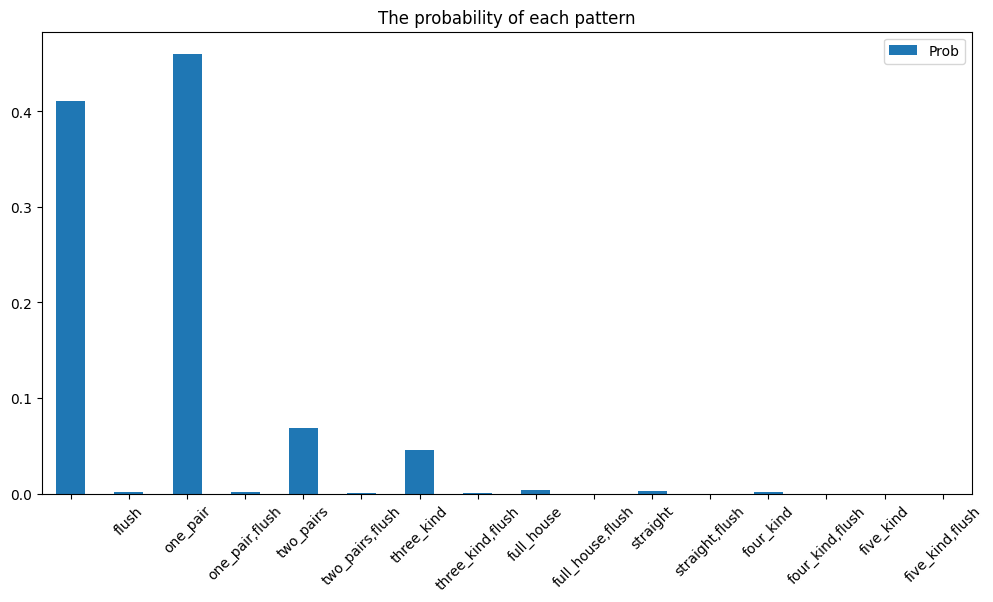

In [ ]:
patterns_df = pd.DataFrame(sim_df.mean(axis=0))
patterns_df.columns = ['Prob']

print(patterns_df['Prob'].to_dict())
print(sum(patterns_df['Prob']))

import matplotlib.pyplot as plt
patterns_df.plot.bar(y='Prob', figsize=(12,6))
plt.xticks(rotation=45)
plt.title("The probability of each pattern")
plt.show()

# sort by values
patterns_df = patterns_df.sort_values(by='Prob')


In [ ]:
 # if the session terminated, copy the above printed message and reassign
#patterns_prop = {'': 0.41109744, 'flush': 0.0016121249999999998, 'one_pair': 0.460405025, 'one_pair,flush': 0.0018038, 'two_pairs': 0.06906306499999999, 'two_pairs,flush': 0.00027294499999999997, 'three_kind': 0.04599987, 'three_kind,flush': 0.000181835, 'full_house': 0.0041870399999999995, 'full_house,flush': 1.6830000000000003e-05, 'straight': 0.0032134399999999997, 'straight,flush': 1.2565000000000003e-05, 'four_kind': 0.0020905499999999996, 'four_kind,flush': 8.390000000000001e-06, 'five_kind': 3.497e-05, 'five_kind,flush': 1.1000000000000002e-07}
#patterns_df = pd.DataFrame.from_dict(patterns_prop, orient='index', columns=['Prob'])


## (*) True Probability distribution of patterns

We can use simple high school mathematics to calculate the probability of each cases. This part is just a proof of knowledge, in this project, we will not rely on these true probabilities. Instead, we will use the simulated probability

### Five Kind (with/non flush)

In [ ]:
import math

# this is extremely small
# P(five kind and flush) = 13C1 * 4/ 52^5
p_five_kind_flush = math.comb(13, 1) * 4 / 52**5
print(f"P(five kind and flush) = {p_five_kind_flush:.20f}, sim prob = {patterns_df.at['five_kind,flush', 'Prob']:.20f}")


# P(five kind and non-flush) = (13C1 * (4^5 - 4)) / 52^5
p_five_kind_non_flush = (math.comb(13,1) * 4**5) / 52**5 - p_five_kind_flush
print(f"P(five kind and non-flush) = {p_five_kind_non_flush:.20f}, sim prob = {patterns_df.at['five_kind', 'Prob']:.20f}")

P(five kind and flush) = 0.00000013676867056476, sim prob = 0.00000013000000000000
P(five kind and non-flush) = 0.00003487601099401282, sim prob = 0.00003418000000000001


### Four Kind (with/non flush)

In [ ]:

# P(four kind and flush) = 13C2 * 2C1 * 4 * 5 / 52^5
# numerator: from 13 different numbers choose 2, then from the 2 choose 1 having four, and there are 5!/4! = 5 arrangements
p_four_kind_flush = math.comb(13,2) * 2 * 4 * (math.factorial(5) / math.factorial(4)) / 52**5
print(f"P(four kind and flush) = {p_four_kind_flush:.20f}, sim prob = {patterns_df.at['four_kind,flush', 'Prob']:.20f}")

# P(four kind and non-flush) = 13C2 * 2C1 * 4^5 * 5 / 52^5 - P(four kind and flush)
# numerator: from 13 different numbers choose 2, then from the 2 choose 1 having four, each number have 4 suits, and there are 5!/4! = 5 arrangements
p_four_kind_non_flush = math.comb(13,2) * 2 * 4**5 * 5 / 52**5 - p_four_kind_flush
print(f"P(four kind and non-flush) = {p_four_kind_non_flush:.20f}, sim prob = {patterns_df.at['four_kind', 'Prob']:.20f}")


P(four kind and flush) = 0.00000820612023388537, sim prob = 0.00000806000000000000
P(four kind and non-flush) = 0.00209256065964076891, sim prob = 0.00209860999999999989


### Full House (with/non flush)

In [ ]:


# P(full house and flush) = 13C2 * 2C1 * 4 * 5!/(3!2!) / 52^5
# numerator: from 13 different numbers choose 2, then from the 2 choose 1 having 3, and there are 5!/(3!2!) = 10 arrangements
p_full_house_flush = math.comb(13,2) * 2 * 4 * (math.factorial(5) / math.factorial(3) / math.factorial(2)) / 52**5
print(f"P(full house and flush) = {p_full_house_flush:.20f}, sim prob = {patterns_df.at['full_house,flush', 'Prob']:.20f}")

# P(full house and non-flush) = 13C2 * 2C1 * 4^5 * 5 / 52^5 - P(full house and flush)
# numerator: from 13 different numbers choose 2, then from the 2 choose 1 having 3, each number have 4 suits, and there are 5!/4! = 5 arrangements
p_full_house_non_flush = math.comb(13,2) * 2 * 4**5 * (math.factorial(5) / math.factorial(3) / math.factorial(2))/ 52**5 - p_full_house_flush
print(f"P(full house and non-flush) = {p_full_house_non_flush:.20f}, sim prob = {patterns_df.at['full_house', 'Prob']:.20f}")

P(full house and flush) = 0.00001641224046777074, sim prob = 0.00001664000000000000
P(full house and non-flush) = 0.00418512131928153782, sim prob = 0.00417443999999999975


### Three Kind (with/non flush)

In [ ]:

# P(three kind and flush) = 13C3 * 3C1 * 4 * (5!/3!1!1!) / 52^5
# numerator: from 13 different numbers choose 3, then from the 3 choose 1 having 3, with 4 suits, and there are 5!/3!1!1! = 20 arrangements
p_three_kind_flush = math.comb(13,3) * 3 * 4 * (math.factorial(5) / math.factorial(3)) / 52**5
print(f"P(three kind and flush) = {p_three_kind_flush:.20f}, sim prob = {patterns_df.at['three_kind,flush', 'Prob']:.20f}")

# P(three kind and non-flush) = 13C3 * 3C1 * 4^5 * (5!/3!1!1!) / 52^5 - P(three kind and flush)
# numerator: from 13 different numbers choose 2, then from the 2 choose 1 having four, each number have 4 suits, and there are 5!/3!1!1! = 20 arrangements
p_three_kind_non_flush = math.comb(13,3) * 3 * 4**5 * (math.factorial(5)/math.factorial(3)) / 52**5 - p_three_kind_flush
print(f"P(three kind and non-flush) = {p_three_kind_non_flush:.20f}, sim prob = {patterns_df.at['three_kind', 'Prob']:.20f}")

P(three kind and flush) = 0.00018053464514547810, sim prob = 0.00018034000000000003
P(three kind and non-flush) = 0.04603633451209691863, sim prob = 0.04602664000000000061


### Two Pairs (with/non flush)

In [ ]:

# P(two pairs and flush) = 13C3 * 3C1 * 4 * (5!/3!1!1!) / 52^5
# numerator: from 13 different numbers choose 3, then from the 3 choose 2 having 2, with 4 suits, and there are 5!/2!2!1! = 30 arrangements
p_two_pairs_flush = math.comb(13,3) * math.comb(3,2) * 4 * (math.factorial(5) / math.factorial(2) / math.factorial(2)) / 52**5
print(f"P(two pairs and flush) = {p_two_pairs_flush:.20f}, sim prob = {patterns_df.at['two_pairs,flush', 'Prob']:.20f}")

# P(two pairs and non-flush) = 13C3 * 3C1 * 4^5 * (5!/3!1!1!) / 52^5 - P(two pairs and flush)
# numerator: from 13 different numbers choose 3, then from the 3 choose 2 having 2, each number have 4 suits, and there are 5!/2!2!1! = 30 arrangements
p_two_pairs_non_flush = math.comb(13,3) * math.comb(3,2) * 4**5 * (math.factorial(5) / math.factorial(2) / math.factorial(2)) / 52**5 - p_two_pairs_flush
print(f"P(two pairs and non-flush) = {p_two_pairs_non_flush:.20f}, sim prob = {patterns_df.at['two_pairs', 'Prob']:.20f}")


P(two pairs and flush) = 0.00027080196771821718, sim prob = 0.00027370000000000004
P(two pairs and non-flush) = 0.06905450176814538488, sim prob = 0.06907030000000000114


### One Pair (with/non flush)

In [ ]:
# P(one pair and flush) = 13C4 * 4C1 * 4 * (5!/2!) / 52^5
# numerator: from 13 different numbers choose 4, then from the 4 choose 1 having 2, with 4 suits, and there are 5!/2! = 60 arrangements
p_one_pair_flush = math.comb(13,4) * math.comb(4,1) * 4 * (math.factorial(5) / math.factorial(2)) / 52**5
print(f"P(one pair and flush) = {p_one_pair_flush:.20f}, sim prob = {patterns_df.at['one_pair,flush', 'Prob']:.20f}")

# P(one pair and non-flush) = 13C4 * 4C1 * 4^5 * (5!/2!) / 52^5 - P(one pair and flush)
# numerator: from 13 different numbers choose 4, then from the 4 choose 1 having 2, each number have 4 suits, and there are 5!/2! = 60 arrangements
p_one_pair_non_flush = math.comb(13,4) * math.comb(4,1) * 4**5 * (math.factorial(5) / math.factorial(2)) / 52**5 - p_one_pair_flush
print(f"P(one pair and non-flush) = {p_one_pair_non_flush:.20f}, sim prob = {patterns_df.at['one_pair', 'Prob']:.20f}")

P(one pair and flush) = 0.00180534645145478110, sim prob = 0.00180696999999999997
P(one pair and non-flush) = 0.46036334512096915850, sim prob = 0.46036029000000000533


### Straight (with/non flush)

In [ ]:
# without ordering, there are [A,2,3,4,5], [2,3,4,5,6], ..., [9,10,J,Q,K], [10,J,Q,K,A] = 10 possibilities


# P(straight and flush) = 10 * 4 * 5!/ 52^5
# numerator: there are 10 such possible outcomes, with 4 suits, and 5! arrangements
p_straight_flush = 10 * 4 * math.factorial(5) / 52**5
print(f"P(straight and flush) = {p_straight_flush:.20f}, sim prob = {patterns_df.at['straight,flush', 'Prob']:.20f}")

# P(straight and non flush) = 10 * 4**5 * 5!/ 52^5 - # P(straight and flush)
# numerator: there are 10 such possible outcomes, each can choose any suit 4*4*4*4, and 5! arrangements
p_straight_non_flush = 10 * 4**5 * math.factorial(5) / 52**5 - p_straight_flush
print(f"P(straight and non-flush) = {p_straight_non_flush:.20f}, sim prob = {patterns_df.at['straight', 'Prob']:.20f}")

P(straight and flush) = 0.00001262480035982364, sim prob = 0.00001292000000000000
P(straight and non-flush) = 0.00321932409175502889, sim prob = 0.00321888999999999986


### Flush only

Only flush, without other types

In [ ]:

# flush will contain other type (like one pair and flush, two pairs and flush, ......)
# P(flush) = 13^5 * 4 / 52^5
# numerator: any 5 cards, each number have 4 suits
p_flush = 13**5 * 4 / 52**5
print(f"P(flush) = {p_flush:.20f}")



# P(flush only) = P(flush) - P(straight and flush) - P(one pair and flush) - P(two pairs and flush) - P(three kind and flush) - P(full house and flush) - P(four kind and flush) - P(five kind and flush)
# numerator: any 5 cards, each number have 4 suits
p_flush_only = p_flush - p_straight_flush - p_one_pair_flush - p_two_pairs_flush - p_three_kind_flush - p_full_house_flush - p_four_kind_flush - p_five_kind_flush
print(f"P(flush only) = {p_flush_only:.20f}, sim prob = {patterns_df.at['flush', 'Prob']:.20f}")

P(flush) = 0.00390625000000000000
P(flush only) = 0.00161218700594947958, sim prob = 0.00160868999999999964


### No Patterns

In [ ]:
p_no_patterns = 1 - p_flush - p_straight_non_flush - p_one_pair_non_flush - p_two_pairs_non_flush - p_three_kind_non_flush - p_full_house_non_flush - p_four_kind_non_flush - p_five_kind_non_flush
print(f"P(no patterns) = {p_no_patterns:.20f}, sim prob = {patterns_df.at['', 'Prob']:.20f}")

P(no patterns) = 0.41110768651711709909, sim prob = 0.41110920000000000796


In [ ]:
true_prob_pattern_pf = patterns_df.copy()
true_prob_pattern_pf['True Prob'] = {'': p_no_patterns, 'flush': p_flush_only,
                                     'five_kind,flush': p_five_kind_flush, 'five_kind': p_five_kind_non_flush,
                                     'four_kind,flush': p_four_kind_flush, 'four_kind': p_four_kind_non_flush,
                                     'straight,flush': p_straight_flush, 'straight': p_straight_non_flush,
                                     'full_house,flush': p_full_house_flush, 'full_house': p_full_house_non_flush,
                                     'three_kind,flush': p_three_kind_flush, 'three_kind': p_three_kind_non_flush,
                                     'two_pairs,flush': p_two_pairs_flush, 'two_pairs': p_two_pairs_non_flush,
                                     'one_pair,flush': p_one_pair_flush, 'one_pair': p_one_pair_non_flush}

true_prob_pattern_pf['Absolute Error'] = np.abs(true_prob_pattern_pf['Prob'] - true_prob_pattern_pf['True Prob'])


In [ ]:
true_prob_pattern_pf

,Prob,True Prob,Absolute Error
"five_kind,flush",1.300000e-07,1.367687e-07,6.768671e-09
"four_kind,flush",8.060000e-06,8.206120e-06,1.461202e-07
"straight,flush",1.292000e-05,1.262480e-05,2.951996e-07
"full_house,flush",1.664000e-05,1.641224e-05,2.277595e-07
five_kind,3.418000e-05,3.487601e-05,6.960110e-07
"three_kind,flush",1.803400e-04,1.805346e-04,1.946451e-07
"two_pairs,flush",2.737000e-04,2.708020e-04,2.898032e-06
flush,1.608690e-03,1.612187e-03,3.497006e-06
"one_pair,flush",1.806970e-03,1.805346e-03,1.623549e-06
four_kind,2.098610e-03,2.092561e-03,6.049340e-06


## Reward Allocation

In reality, we may not know how to assign the reward, but surely there are no reward for "no pattern matched". Rewards should depend on the respective probabilities. The lower the probability, the higher the reward.

In [ ]:
patterns_df = patterns_df.sort_values(by='Prob', ascending=False)

In [ ]:
patterns_df

,Prob
one_pair,4.603603e-01
,4.111092e-01
two_pairs,6.907030e-02
three_kind,4.602664e-02
full_house,4.174440e-03
straight,3.218890e-03
four_kind,2.098610e-03
"one_pair,flush",1.806970e-03
flush,1.608690e-03
"two_pairs,flush",2.737000e-04


Obviously, the most trivial reward allocation strategy is to set to the reciprocal of probability and dividid by total number of classes.

In [ ]:
# since there are 14 patterns, so one of the reward allocation:
temp_df = patterns_df['Prob'].drop('', axis=0)
temp_df ** -1 / temp_df.shape[0]



one_pair                 0.144814
two_pairs                0.965200
three_kind               1.448437
full_house              15.970206
straight                20.711073
four_kind               31.767059
one_pair,flush          36.894175
flush                   41.441587
two_pairs,flush        243.575691
three_kind,flush       369.672101
five_kind             1950.458358
full_house,flush      4006.410256
straight,flush        5159.958720
four_kind,flush       8271.298594
five_kind,flush     512820.512821
Name: Prob, dtype: float64

In [ ]:
# so the expected reward will be 1 here
print(sum(temp_df * temp_df ** -1 / temp_df.shape[0]))

# by taking cost into account, we can simply re-scale it
cost = 10
print(sum(temp_df * temp_df ** -1 / temp_df.shape[0]) * cost) # note for rounding error)

# or re-scale it by another factor so that the expected reward is slighly less than the cost
# hence the expected gain is negative
print(sum(temp_df * temp_df ** -1 / temp_df.shape[0]) * cost * 0.95) # note for rounding error)


0.9999999999999999
9.999999999999998
9.499999999999998


In [ ]:
pd.set_option('display.float_format', '{:.3f}'.format)
sum(temp_df * (temp_df ** -1 / temp_df.shape[0] * cost * 0.95).round(0))
pd.reset_option('display.float_format')

In [ ]:
trivial_reward = (temp_df ** -1 / temp_df.shape[0] * cost * 0.95).round(0)
trivial_reward = pd.concat((temp_df, pd.DataFrame(trivial_reward)), axis=1)
trivial_reward.columns = ['Prob', 'Reward']

trivial_reward

,Prob,Reward
one_pair,4.603603e-01,1.0
two_pairs,6.907030e-02,9.0
three_kind,4.602664e-02,14.0
full_house,4.174440e-03,152.0
straight,3.218890e-03,197.0
four_kind,2.098610e-03,302.0
"one_pair,flush",1.806970e-03,350.0
flush,1.608690e-03,394.0
"two_pairs,flush",2.737000e-04,2314.0
"three_kind,flush",1.803400e-04,3512.0


This is a solution after rounding the reward into the nearest integer, but we can have less control of the reward, says, the maximum reward for the game. It is not that easy to rescale the maximum reward and re-distribute the reward to other patterns. We still need to keep the expected reward be less than the cost

### Define a expected gain function

We may suppose that the cost of the game is C first, it is a 15 parameters function (assuming the initial cost N coins is fixed)


f(C,x1,x2,x3,...,x15) = - C + $\sum_{i=1}^{15} x_i P(pattern_i)$

or rewritten as

$$
f(x | p, C) = p^Tx - C
$$

and we wish to maximize f, f to be negative (slightly, or otherwise no one would play this game), and each variables x are positive integers (but in common sense, we need low probability events should have a very large rewards)

We then can take a look of some combinations:

In [ ]:
p = patterns_df['Prob']
p = p.drop('', axis=0)
p = p.to_numpy()

p

array([4.6036029e-01, 6.9070300e-02, 4.6026640e-02, 4.1744400e-03,
       3.2188900e-03, 2.0986100e-03, 1.8069700e-03, 1.6086900e-03,
       2.7370000e-04, 1.8034000e-04, 3.4180000e-05, 1.6640000e-05,
       1.2920000e-05, 8.0600000e-06, 1.3000000e-07])

In [ ]:
def expected_gain(C, x):
  return np.matmul(p, x) - C

In [ ]:
import numpy as np

# this means, to play a game with cost 10 coins, the gambler with loss 1.39 per game on average
expected_gain(10, np.arange(15, 0, -1))

-1.3903552999999977

In [ ]:
# this means, to play a game with cost 10 coins, the gambler with loss 0.803 per game on average
# this works, but not realistic
expected_gain(10, np.arange(16, 1, -1))

-0.801464499999998

There are infinitely many ways to assign the variables. It is a common integer programming problems.

### Optimization Problem

We would like to perform this integer programming optimization problem:

\begin{align}
maximize &: \underline{p}^T\underline{x} - C \\
\text{subject to} &: x_i > 0 \forall \ i, \\
&\  L \le x_0 \\
&\  a_i x_i < x_j \forall i<j,\\
&\  x_{15} \le U \\
&\  p^Tx-C < 0 \\
\end{align}

where $x_i$ are positive integers $\forall \ i$, $a_i > 1$


In [ ]:
!pip install pulp
from pulp import LpMaximize, LpProblem, LpVariable, lpSum


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 69.5 MB/s eta 0:00:00


In [ ]:

### Note that the IP problem may not converge, so to determine a feasible solution, we need to check if all requirements are matched (i.e. all rewards are positive integers)

# patterns_df: the dataframe of the patterns (with estimated probability)
# coef_array: the coefficient to define the ratio of consecutive rewards, e.g. the coef C * x1 < x2
# cost: the cost nof a game
# min_reward: determine the minimum of the highest probable type
# max_reward: determine the maximum of the rarest type
# max expected gain: the maximal allowed objective function
def reward_allocation(patterns_df, coef_array, cost, min_reward, max_reward, max_expected_gain = 0):

  if(len(coef_array) != 14):
    raise Exception("error, the coef_array must have the same length, length=" + str(len(coef_array)))

  # prob array
  df = patterns_df.sort_values(by='Prob', ascending=False)
  df = df.drop('', axis=0)

  p = df['Prob'].to_numpy()

  # Create a maximization problem
  model = LpProblem(name="integer_programming", sense=LpMaximize)

  # Decision variables
  # for better sorting the names, left pad a 0 on each name of decision variable with single digit
  x = {i: LpVariable(name=f"x{str(i).zfill(2)}", lowBound=1, cat='Integer') for i in range(0, 15)}


  # Objective function
  objective_function = -1 * cost
  for i in range(15):
    objective_function += p[i] * x[i]

  model += objective_function


  epsilon = 1e-6  # Small positive constant to make straight inequality to include equality sign, which is required by integer programming


  # min reward
  model += (x[0] >= min_reward, "min bound of most probable type")
  # Constraints: i from 0, 1, 2, ..., 13
  for i in range(0, 14):
    model += (x[i] * coef_array[i] + epsilon <= x[i+1])

  model += (x[14] <= max_reward, "max bound of rarest type")
  model += (objective_function + epsilon  <= max_expected_gain, "max allowed excpected gain:f<%s" % (max_expected_gain))

  # Solve the problem
  model.solve()


  df['Reward'] = [var.value() for var in model.variables()]

  is_converged = True
  for var in model.variables():
    value = var.value()
    if value < 0:
      is_converged = False
      break
    else:
      if not value.is_integer():
        is_converged = False

  return {'df': df, 'opt_exp_gain': model.objective.value(), 'converged': is_converged}





#### Examples

In [ ]:
# Example0:
# fixed coefficient array, with all coefficients are 1 (we can see the importance of this coefficient array); minimum reward when matching type = 5, max = 1000000, cost = 10, maximum allowed expected gain = 0
eg0 = reward_allocation(patterns_df, coef_array=[1]*14, cost=10, min_reward=5, max_reward=1e6)

print(eg0['df'])
print("")
print("optimized expected gain = ", eg0['opt_exp_gain'])
print("is converged = ", eg0['converged'])
print("expected reward = ", sum(eg0['df']['Prob'] * eg0['df']['Reward']))

                          Prob    Reward
one_pair          4.603603e-01       5.0
two_pairs         6.907030e-02       6.0
three_kind        4.602664e-02       7.0
full_house        4.174440e-03       9.0
straight          3.218890e-03      10.0
four_kind         2.098610e-03      12.0
one_pair,flush    1.806970e-03      14.0
flush             1.608690e-03      15.0
two_pairs,flush   2.737000e-04      16.0
three_kind,flush  1.803400e-04      17.0
five_kind         3.418000e-05      18.0
full_house,flush  1.664000e-05      19.0
straight,flush    1.292000e-05      20.0
four_kind,flush   8.060000e-06  829885.0
five_kind,flush   1.300000e-07  920856.0

optimized expected gain =  -9.999999998761e-07
is converged =  True
expected reward =  9.999999


In [ ]:
# Example1:
# fixed coefficient array, minimum reward when matching type = 5, max = 1000000, cost = 10, maximum allowed expected gain = 0
eg = reward_allocation(patterns_df, coef_array=[2,1,2,1,2.2,2,2,2,5,2,2,2,1.5,3], cost=10, min_reward=5, max_reward=1e6)

print(eg['df'])
print("")
print("optimized expected gain = ", eg['opt_exp_gain'])
print("is converged = ", eg['converged'])
print("expected reward = ", sum(eg['df']['Prob'] * eg['df']['Reward']))

                          Prob     Reward
one_pair          4.603603e-01        5.0
two_pairs         6.907030e-02       11.0
three_kind        4.602664e-02       12.0
full_house        4.174440e-03       25.0
straight          3.218890e-03       47.0
four_kind         2.098610e-03      105.0
one_pair,flush    1.806970e-03      212.0
flush             1.608690e-03      426.0
two_pairs,flush   2.737000e-04      855.0
three_kind,flush  1.803400e-04     4278.0
five_kind         3.418000e-05     8557.0
full_house,flush  1.664000e-05    17115.0
straight,flush    1.292000e-05    34232.0
four_kind,flush   8.060000e-06   333333.0
five_kind,flush   1.300000e-07  1000000.0

optimized expected gain =  -1.8100000004073191e-06
is converged =  True
expected reward =  9.99999819


In [ ]:

# define a function to avoid replication
def experiment_reward_allocation(patterns_df, coef_array, cost, min_reward, max_reward, max_expected_gain):
  eg = reward_allocation(patterns_df, coef_array, cost, min_reward, max_reward, max_expected_gain)


  print(eg['df'])
  print("")
  print("optimized expected gain = ", eg['opt_exp_gain'])
  print("is converged = ", eg['converged'])
  print("expected reward = ", sum(eg['df']['Prob'] * eg['df']['Reward']))

  return eg


In [ ]:
# Example2:
# fixed coefficient array, minimum reward when matching type = 5, max = 1000000, cost = 10, maximum allowed expected gain = -0.1

eg2 = experiment_reward_allocation(patterns_df, coef_array=[2,1,2,1,2.2,2,2,2,5,2,2,2,1.5,3], cost=10, min_reward=5, max_reward=1e6, max_expected_gain=-0.1)

                          Prob    Reward
one_pair          4.603603e-01       5.0
two_pairs         6.907030e-02      11.0
three_kind        4.602664e-02      12.0
full_house        4.174440e-03      26.0
straight          3.218890e-03      28.0
four_kind         2.098610e-03      62.0
one_pair,flush    1.806970e-03     215.0
flush             1.608690e-03     432.0
two_pairs,flush   2.737000e-04     865.0
three_kind,flush  1.803400e-04    4348.0
five_kind         3.418000e-05    8699.0
full_house,flush  1.664000e-05   17402.0
straight,flush    1.292000e-05   34805.0
four_kind,flush   8.060000e-06  333304.0
five_kind,flush   1.300000e-07  999946.0

optimized expected gain =  -0.10000101999999955
is converged =  True
expected reward =  9.899998980000001


In [ ]:
# Example3:
# fixed coefficient array like, minimum reward when matching type = 5, max = 1000000, cost = 10, maximum allowed expected gain = -0.5


eg3 = experiment_reward_allocation(patterns_df, coef_array=[2,1,2,1,2.2,2,2,2,5,2,2,2,1.5,3], cost=10, min_reward=5, max_reward=1e6, max_expected_gain=-0.5)


                          Prob    Reward
one_pair          4.603603e-01       5.0
two_pairs         6.907030e-02      11.0
three_kind        4.602664e-02      12.0
full_house        4.174440e-03      25.0
straight          3.218890e-03      26.0
four_kind         2.098610e-03      94.0
one_pair,flush    1.806970e-03     190.0
flush             1.608690e-03     381.0
two_pairs,flush   2.737000e-04     763.0
three_kind,flush  1.803400e-04    3816.0
five_kind         3.418000e-05    7638.0
full_house,flush  1.664000e-05   15277.0
straight,flush    1.292000e-05   30555.0
four_kind,flush   8.060000e-06  323558.0
five_kind,flush   1.300000e-07  997024.0

optimized expected gain =  -0.5000010399999996
is converged =  True
expected reward =  9.499998960000001


In [ ]:
# Example4:
# fixed coefficient array, minimum reward when matching type = 5, max = 1000000, cost = 10, maximum allowed expected gain = -1

eg4 = experiment_reward_allocation(patterns_df, coef_array=[2,1,2,1,2.2,2,2,2,5,2,2,2,1.5,3], cost=10, min_reward=5, max_reward=1e6, max_expected_gain=-1)



                          Prob     Reward
one_pair          4.603603e-01        5.0
two_pairs         6.907030e-02       11.0
three_kind        4.602664e-02       12.0
full_house        4.174440e-03       25.0
straight          3.218890e-03       36.0
four_kind         2.098610e-03       80.0
one_pair,flush    1.806970e-03      161.0
flush             1.608690e-03      323.0
two_pairs,flush   2.737000e-04      648.0
three_kind,flush  1.803400e-04     3241.0
five_kind         3.418000e-05     6483.0
full_house,flush  1.664000e-05    12968.0
straight,flush    1.292000e-05    26203.0
four_kind,flush   8.060000e-06   312616.0
five_kind,flush   1.300000e-07  1000000.0

optimized expected gain =  -1.00000297
is converged =  True
expected reward =  8.99999703


In [ ]:
# Example5:
# fixed coefficient array, minimum reward when matching type = 5, max = 1000000, cost = 10, maximum allowed expected gain = -5
# this is an example that the IP problem not converged

eg5 = experiment_reward_allocation(patterns_df, coef_array=[2,1,2,1,2.2,2,2,2,5,2,2,2,1.5,3], cost=10, min_reward=5, max_reward=1e6, max_expected_gain=-5)


                          Prob        Reward
one_pair          4.603603e-01      5.000000
two_pairs         6.907030e-02     10.000001
three_kind        4.602664e-02     10.000002
full_house        4.174440e-03     20.000005
straight          3.218890e-03     20.000006
four_kind         2.098610e-03     44.000014
one_pair,flush    1.806970e-03     88.000029
flush             1.608690e-03    156.058160
two_pairs,flush   2.737000e-04    312.116320
three_kind,flush  1.803400e-04   1560.581600
five_kind         3.418000e-05   3121.163200
full_house,flush  1.664000e-05   6242.326300
straight,flush    1.292000e-05  12484.653000
four_kind,flush   8.060000e-06  18726.979000
five_kind,flush   1.300000e-07  56180.937000

optimized expected gain =  -5.00000098585181
is converged =  False
expected reward =  4.99999901414819


In [ ]:
# Example6:
# fixed coefficient array like eg3, but with different coef array, minimum reward when matching type = 5, max = 1000000, cost = 10, maximum allowed expected gain = -0.5
eg6 = experiment_reward_allocation(patterns_df, coef_array=[3,3,1,1,1,1,2,2,3.5,2,1.5,2,3,3], cost=10, min_reward=5, max_reward=1e6, max_expected_gain=-0.5)



                          Prob     Reward
one_pair          4.603603e-01        5.0
two_pairs         6.907030e-02       16.0
three_kind        4.602664e-02       49.0
full_house        4.174440e-03       50.0
straight          3.218890e-03       51.0
four_kind         2.098610e-03       52.0
one_pair,flush    1.806970e-03       53.0
flush             1.608690e-03      107.0
two_pairs,flush   2.737000e-04      215.0
three_kind,flush  1.803400e-04      753.0
five_kind         3.418000e-05     1631.0
full_house,flush  1.664000e-05    29804.0
straight,flush    1.292000e-05    59609.0
four_kind,flush   8.060000e-06   178831.0
five_kind,flush   1.300000e-07  1000000.0

optimized expected gain =  -0.5000022400000018
is converged =  True
expected reward =  9.499997760000001


From these experiments, we can see that we can have a way to adjust the rewards such that, the expected gain for the player is confirmed to be negative (no matter as little as just 0, or -1).

Also, by controlling the min/max rewards, we can easier to design a "attractive game" for the player, because or otherwise, a extremely boring game can assign (1 + 10 )/ P(five_kind,flush) rewards for getting five_kind,flush, and 0 otherwise. Clearly, the expected reward for the gambler is positive, but obviously no one will play.


In the next part, we will look at some basic gambler's behavior, and how these behavior may affect the average length of game plays.

## Gambler's behavior and Length of game

To design a game, what we might also wish is to maximize the average game plays. There are a few advantages:
1. AD income: for icasino, the web may have some ads to get advertisement income. The calculation is usually the ad click and page viewed. So keeping the player in the website can increase ad income.
2. Loyalty: we wish the gambler to keep playing our games. If the gambler keep playing (if they are happy with playing our game), because the expected gain for them is negative, we can gain money in the long run.

In this part, we will discuss some basic gambler's behavior, and how these may affect the average length of game plays

Suppose the gambler has this basic game play behavior:
1. 5 losses in a row will leave (believed bad fortune)
2. becomes 100 times of initial capital will leave (earned enough)
3. at most play 100 games (tired)

In [ ]:
import os
import time

### We can use the probability distribution directly instead of simulate a game play, which will be much faster
### Here we demo how to simulate from game play
def play_game(reward_map, initial_capital=100, cost=10, max_play=100, max_loss_run=5, gain_cap_factor=100):

  # because of multiprocessing, without setting "random" seed will induce duplication problem
  seed = np.random.RandomState().randint(0,os.getpid(),size=1)
  np.random.seed(seed)

  spin = spin_poker()

  capital = initial_capital
  trace = [initial_capital]

  loss_run = 0
  leave_reason = ''

  matched_pattern_count = dict.fromkeys(reward_map, 0)
  matched_pattern_count[''] = 0

  outcomes = spin.generate_n(max_play)
  step=1 # from our definition, we defined step for each play is positive, step 0 be the initial state

  while (
      loss_run <= max_loss_run                        # condition 1
      and capital <= gain_cap_factor * initial_capital    # condition 2
      and len(trace) < max_play                           # condition 3
      and capital >= cost                             # rules of a game: insert credits to play
      ):

    capital -= cost

    outcome = outcomes[step-1]

    patt = pattern(list(map(lambda x: Card.from_index(x), outcome)))

    reward = reward_map.get(patt,0)
    capital += reward

    matched_pattern_count[patt] +=1

    trace.append(capital)
    step += 1


    if reward==0:
      loss_run += 1
    else :
      loss_run = 0

  if loss_run>max_loss_run:
    leave_reason = 'consecutive losses'

  if len(trace)==max_play:
    leave_reason = 'played max runs'

  if capital > gain_cap_factor * initial_capital:
    leave_reason = 'gained enough'

  if capital < cost:
    leave_reason = 'ruined'

  return {'trace': trace, 'reason': leave_reason, 'matched_pattern_count': matched_pattern_count}



def parallel_processing(n, reward_map):
  with ProcessPoolExecutor() as executor:
    futures = [executor.submit(play_game, reward_map) for i in range(n)]

    results = [future.result() for future in futures]

  return results





### Using reward example 3

In [ ]:
# using example 3 rewards
matched_pattern_reward3 = eg3['df'].to_dict()['Reward']

traces3 = parallel_processing(n=20000, reward_map=matched_pattern_reward3)

In [ ]:
# total length (total game plays):
sum([len(trace['trace'])-1 for trace in traces3])

373542

In [ ]:
# average length:
np.average([len(trace['trace'])-1 for trace in traces3])

18.6771

In [ ]:
# total gamblers' earn/loss, sum their final capital, minus their initial capital
sum([trace['trace'][-1]-100 for trace in traces3])

1434312.0

In [ ]:
# count every reason
(pd.DataFrame(traces3)).groupby(['reason']).size()

reason
consecutive losses      535
gained enough            28
played max runs         220
ruined                19217
dtype: int64

In [ ]:
# count each type
out3 = {}
for trace in traces3:
  out3 = {key: out3.get(key, 0) + trace['matched_pattern_count'].get(key, 0) for key in set(out3) | set(trace['matched_pattern_count'])}

out3

{'': 153241,
 'one_pair,flush': 691,
 'straight,flush': 4,
 'five_kind': 18,
 'two_pairs': 25613,
 'five_kind,flush': 0,
 'two_pairs,flush': 110,
 'four_kind': 785,
 'flush': 551,
 'straight': 1082,
 'three_kind,flush': 53,
 'one_pair': 172076,
 'full_house': 1535,
 'three_kind': 17762,
 'full_house,flush': 13,
 'four_kind,flush': 8}

We can see that almost all of them are ruined. And the average length is just around 20. Suppose each game play take just 20 seconds, then each just spend 400=6.7 minutes on average.

In this project, we assumed the game mechanism so the probability of loss is not adjustable. However, we can adjust the reward to make the gambler less likely to ruin, and can't gain too much. Hence the gambler can stay playing with enough capitals, and play until tired


### Using reward example 6

In [ ]:

matched_pattern_reward6 = eg6['df'].to_dict()['Reward']

traces6 = parallel_processing(n=20000, reward_map=matched_pattern_reward6)

print("# total length (total game plays):", sum([len(trace['trace'])-1 for trace in traces6]))

print("# average length:", np.average([len(trace['trace'])-1 for trace in traces6]))

print("# total gamblers' earn/loss, sum their final capital, minus their initial capital:", sum([trace['trace'][-1]-100 for trace in traces6]))

# it is make sense that their capitals may be positive from simulations
# because of the negative expected gain, we should expect that the gain should be negative in the long run.


# total length (total game plays): 526251
# average length: 26.31255
# total gamblers' earn/loss, sum their final capital, minus their initial capital: -87901.0


In [ ]:
# count each type
out6 = {}
for trace in traces6:
  out6 = {key: out6.get(key, 0) + trace['matched_pattern_count'].get(key, 0) for key in set(out6) | set(trace['matched_pattern_count'])}

out6

{'': 215960,
 'one_pair,flush': 1025,
 'straight,flush': 10,
 'five_kind': 16,
 'two_pairs': 36466,
 'five_kind,flush': 0,
 'two_pairs,flush': 153,
 'four_kind': 1129,
 'flush': 837,
 'straight': 1731,
 'three_kind,flush': 66,
 'one_pair': 242783,
 'full_house': 2220,
 'three_kind': 23833,
 'full_house,flush': 19,
 'four_kind,flush': 3}

In [ ]:

# count every reason
(pd.DataFrame(traces6)).groupby(['reason']).size()

reason
consecutive losses      903
gained enough            32
played max runs         186
ruined                18879
dtype: int64

From these 2 examples, we can see that the reward distribution can affect the average length of game

To compare example 3 reward and example 6:

In [ ]:
temp = pd.concat([eg3['df'], eg6['df']['Reward']], axis=1)
temp.columns = ['Prob', 'Eg3 Reward', 'Eg6 Reward']

temp

,Prob,Eg3 Reward,Eg6 Reward
one_pair,4.603603e-01,5.0,5.0
two_pairs,6.907030e-02,11.0,16.0
three_kind,4.602664e-02,12.0,49.0
full_house,4.174440e-03,25.0,50.0
straight,3.218890e-03,26.0,51.0
four_kind,2.098610e-03,94.0,52.0
"one_pair,flush",1.806970e-03,190.0,53.0
flush,1.608690e-03,381.0,107.0
"two_pairs,flush",2.737000e-04,763.0,215.0
"three_kind,flush",1.803400e-04,3816.0,753.0


### Comparison of these example3 and example6 reward allocations

From here, we can see that eg6 reward higher for high probability pattern, lower for rare pattern except the largest prize.

It seemed that, one of our strategy to distribute the reward is that, to give 'more' for high occurrence pattern so that the gambler will feel happy and stay playing, but low for rare type so that the expected gain for the gambler is controlled.

There may have a optimal allocation of rewards, but unless we can calculate it by hand explicitly, we can't get the global optimal.

Simulation is another approach, although we can't ensure the global optimum will be reached because of the game is purely random, we can still get some insight. Also, directly through simulation can easily change our objective if we have further quantities that we wanted to optimize.

We have 2 possible ways of assigning the rewards by controlling the coefficient array:
1. each coefficient change from min to max by small increment
2. set all coefficients be independent uniform random variables ~U(min,max)

using 1 can ensure the optimal precisely, but it is time consuming. Even if we take consecutive integers ranging from 1 to 3, we need 3^14 number of trials

using 2 may miss the optimal allocation, but faster to find a feasible solution out of a number of simulations.


### (*) Using trivial reward

Just for interest, see what would happen if directly using the trivial reward strategy

In [ ]:
trivial_reward

,Prob,Reward
one_pair,4.603603e-01,1.0
two_pairs,6.907030e-02,9.0
three_kind,4.602664e-02,14.0
full_house,4.174440e-03,152.0
straight,3.218890e-03,197.0
four_kind,2.098610e-03,302.0
"one_pair,flush",1.806970e-03,350.0
flush,1.608690e-03,394.0
"two_pairs,flush",2.737000e-04,2314.0
"three_kind,flush",1.803400e-04,3512.0


In [ ]:

traces0 = parallel_processing(n=50000, reward_map=trivial_reward.to_dict()['Reward'])


print("# total length (total game plays):", sum([len(trace['trace'])-1 for trace in traces0]))

print("# average length:", np.average([len(trace['trace'])-1 for trace in traces0]))

print("# total gamblers' earn/loss, sum their final capital, minus their initial capital:", sum([trace['trace'][-1]-100 for trace in traces0]))

# it is make sense that their capitals may be positive from simulations
# because of the negative expected gain, we should expect that the gain should be negative in the long run.


# total length (total game plays): 871347
# average length: 17.42694
# total gamblers' earn/loss, sum their final capital, minus their initial capital: -1163991.0


surprisingly, the average length is lowest comparing with example 3 and 6

## Searching Optimal Reward Allocation

We should not know the exact global optimal reward allocation unless we search in all directions in small grid size. However, we can simulate simply simulate a range of parameters randomly, and choose the one which can maximize the average length

In [ ]:
# Example7:
# random coefficient array (each coef~Unif(1,3)), minimum reward when matching type = 5, max = 1000000, cost = 10, maximum allowed expected gain = -0.5

findings = []
for i in range(10000000):
  random_coef_array = np.random.uniform(size=14, low=1, high=5)

  exp_gain = reward_allocation(patterns_df, coef_array=random_coef_array, cost=10, min_reward=5, max_reward=1e6, max_expected_gain=-0.5)

  if exp_gain['converged']:

    matched_pattern_reward = exp_gain['df'].to_dict()['Reward']

    traces = parallel_processing(n=50000, reward_map=matched_pattern_reward)

    findings.append({'coef_array': random_coef_array, 'avg_length': np.average([len(trace['trace'])-1 for trace in traces])})

    print(len(findings))

  if len(findings)==100:
    break


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [ ]:

df = pd.DataFrame(findings)
df.sort_values(by='avg_length', ascending=False)

,coef_array,avg_length
15,"[3.9148960153923644, 1.1576723719730464, 1.668...",29.35522
77,"[3.6417313670523033, 2.446925206842522, 1.0081...",29.06136
37,"[3.8726447966035162, 1.1739478212312378, 1.039...",25.85616
99,"[4.849815404382541, 1.1807817968892853, 1.0194...",25.80276
95,"[3.5391545342046578, 1.308550306297335, 2.4085...",25.17862
...,...,...
2,"[1.0978402985089608, 2.0815661437985975, 1.406...",15.85428
80,"[1.124627259085281, 2.0293316130119914, 1.2558...",15.79092
32,"[1.0531513173772167, 1.0285281254272984, 2.444...",15.53902
71,"[1.0443176362465003, 1.417989405740499, 1.1185...",15.37570


In [ ]:
print(df.sort_values(by='avg_length', ascending=False).iloc[0,0])

print(df.sort_values(by='avg_length', ascending=False).iloc[0,1])



[3.91489602 1.15767237 1.66859182 1.58614494 2.08718653 1.37351611
 1.58363133 2.14596871 2.63057798 3.9969153  1.27904819 2.79574994
 2.08090904 3.93644243]
29.35522


In [ ]:
print(df.sort_values(by='avg_length', ascending=False).iloc[1,0])

print(df.sort_values(by='avg_length', ascending=False).iloc[1,1])

[3.64173137 2.44692521 1.00816746 1.21907253 1.08312817 1.74854012
 2.76019846 1.19329381 2.29677538 3.59894768 2.10880902 2.58496637
 4.3186508  4.99429849]
29.06136


In [ ]:
print(df.sort_values(by='avg_length', ascending=False).iloc[2,0])

print(df.sort_values(by='avg_length', ascending=False).iloc[2,1])


[3.8726448  1.17394782 1.03978704 4.34573366 1.71643462 1.56357891
 1.78792671 4.1017659  1.05977416 1.4862847  1.28195425 1.75102938
 4.66846452 3.77584733]
25.85616


After a long execution, the coefficient array that can get high average length of game is:



In [ ]:
# copy from the above printed message, use if restart session is required
#optimal_coef_array = [2.66360095, 4.89232684, 1.32983907 ,1.20700221, 1.01921697, 1.10416011, 2.10300367, 4.63578881 ,1.03504104, 2.22277859 ,1.43580951, 1.93856729, 3.41565728 ,1.18538122]
optimal_coef_array = df.sort_values(by='avg_length', ascending=False).iloc[0,0]

In [ ]:
# try it again if this is not simply by chance

opt_reward_allocation = experiment_reward_allocation(patterns_df, coef_array=optimal_coef_array, cost=10, min_reward=5, max_reward=1e6, max_expected_gain=-0.5)

opt_mapping_pattern_reward = opt_reward_allocation['df'].to_dict()['Reward']

opt_mapping_pattern_reward

                          Prob    Reward
one_pair          4.603603e-01       5.0
two_pairs         6.907030e-02      25.0
three_kind        4.602664e-02      29.0
full_house        4.174440e-03      49.0
straight          3.218890e-03      85.0
four_kind         2.098610e-03     178.0
one_pair,flush    1.806970e-03     249.0
flush             1.608690e-03     395.0
two_pairs,flush   2.737000e-04     849.0
three_kind,flush  1.803400e-04    2234.0
five_kind         3.418000e-05    8930.0
full_house,flush  1.664000e-05   11422.0
straight,flush    1.292000e-05   31934.0
four_kind,flush   8.060000e-06   66454.0
five_kind,flush   1.300000e-07  929587.0

optimized expected gain =  -0.5000014499999991
is converged =  True
expected reward =  9.499998549999999


{'one_pair': 5.0,
 'two_pairs': 25.0,
 'three_kind': 29.0,
 'full_house': 49.0,
 'straight': 85.0,
 'four_kind': 178.0,
 'one_pair,flush': 249.0,
 'flush': 395.0,
 'two_pairs,flush': 849.0,
 'three_kind,flush': 2234.0,
 'five_kind': 8930.0,
 'full_house,flush': 11422.0,
 'straight,flush': 31934.0,
 'four_kind,flush': 66454.0,
 'five_kind,flush': 929587.0}

In [ ]:

opt_traces = parallel_processing(n=50000, reward_map=opt_mapping_pattern_reward)

print("# total length (total game plays):", sum([len(trace['trace'])-1 for trace in opt_traces]))

print("# average length:", np.average([len(trace['trace'])-1 for trace in opt_traces]))

print("# total gamblers' earn/loss, sum their final capital, minus their initial capital:", sum([trace['trace'][-1]-100 for trace in opt_traces]))

# it is make sense that their capitals may be positive from simulations
# because of the negative expected gain, we should expect that the gain should be negative in the long run.


# total length (total game plays): 1457977
# average length: 29.15954
# total gamblers' earn/loss, sum their final capital, minus their initial capital: -684298.0


In [ ]:
# count each type
opt_out = {}
for trace in opt_traces:
  opt_out = {key: opt_out.get(key, 0) + trace['matched_pattern_count'].get(key, 0) for key in set(opt_out) | set(trace['matched_pattern_count'])}

opt_out



{'': 599867,
 'one_pair,flush': 2658,
 'straight,flush': 21,
 'five_kind': 71,
 'two_pairs': 100625,
 'five_kind,flush': 0,
 'two_pairs,flush': 431,
 'four_kind': 3110,
 'flush': 2302,
 'straight': 4626,
 'three_kind,flush': 217,
 'one_pair': 671252,
 'full_house': 6252,
 'three_kind': 66510,
 'full_house,flush': 22,
 'four_kind,flush': 13}

In [ ]:
# count every reason
(pd.DataFrame(opt_traces)).groupby(['reason']).size()

reason
consecutive losses     2722
gained enough            60
played max runs        2797
ruined                44421
dtype: int64

In [ ]:
# second optimal:

# try it again if this is not simply by chance

# copy from the above printed message, use if restart session is required
#optimal_coef_array2 = [4.65184438 ,1.63048182 ,1.97936251, 1.01449559, 1.23015865, 1.17471342,3.82738031 ,1.49329986, 1.46730712 ,2.04520375 ,2.06709514, 1.46425491,3.83308153, 3.20424915]

optimal_coef_array2 = df.sort_values(by='avg_length', ascending=False).iloc[1,0]

opt_reward_allocation2 = experiment_reward_allocation(patterns_df, coef_array=optimal_coef_array2, cost=10, min_reward=5, max_reward=1e6, max_expected_gain=-0.5)

opt_mapping_type_reward2 = opt_reward_allocation2['df'].to_dict()['Reward']

print(opt_mapping_type_reward2)


opt_traces2 = parallel_processing(n=50000, reward_map=opt_mapping_type_reward2)


print("# total length (total game plays):", sum([len(trace['trace'])-1 for trace in opt_traces2]))

print("# average length:", np.average([len(trace['trace'])-1 for trace in opt_traces2]))

print("# total gamblers' earn/loss, sum their final capital, minus their initial capital:", sum([trace['trace'][-1]-100 for trace in opt_traces2]))




                          Prob     Reward
one_pair          4.603603e-01        5.0
two_pairs         6.907030e-02       19.0
three_kind        4.602664e-02       47.0
full_house        4.174440e-03       48.0
straight          3.218890e-03       59.0
four_kind         2.098610e-03       64.0
one_pair,flush    1.806970e-03      112.0
flush             1.608690e-03      310.0
two_pairs,flush   2.737000e-04      370.0
three_kind,flush  1.803400e-04      850.0
five_kind         3.418000e-05     3060.0
full_house,flush  1.664000e-05    14327.0
straight,flush    1.292000e-05    37049.0
four_kind,flush   8.060000e-06   160138.0
five_kind,flush   1.300000e-07  1000000.0

optimized expected gain =  -0.5000021199999992
is converged =  True
expected reward =  9.499997880000002
{'one_pair': 5.0, 'two_pairs': 19.0, 'three_kind': 47.0, 'full_house': 48.0, 'straight': 59.0, 'four_kind': 64.0, 'one_pair,flush': 112.0, 'flush': 310.0, 'two_pairs,flush': 370.0, 'three_kind,flush': 850.0, 'five_kind': 3

In [ ]:
# count each type
opt_out2 = {}
for trace in opt_traces2:
  opt_out2 = {key: opt_out2.get(key, 0) + trace['matched_pattern_count'].get(key, 0) for key in set(opt_out2) | set(trace['matched_pattern_count'])}

print(opt_out2)

# count every reason
print((pd.DataFrame(opt_traces2)).groupby(['reason']).size())


{'': 598039, 'one_pair,flush': 2575, 'straight,flush': 25, 'five_kind': 83, 'two_pairs': 100640, 'five_kind,flush': 0, 'two_pairs,flush': 396, 'four_kind': 3154, 'flush': 2266, 'straight': 4645, 'three_kind,flush': 234, 'one_pair': 669545, 'full_house': 6117, 'three_kind': 66553, 'full_house,flush': 17, 'four_kind,flush': 8}
reason
consecutive losses     2738
gained enough            50
played max runs        1971
ruined                45241
dtype: int64


In [ ]:
temp = pd.concat([eg3['df'], eg6['df']['Reward'], opt_reward_allocation['df']['Reward'], opt_reward_allocation2['df']['Reward']], axis=1)
temp.columns = ['Prob', 'Eg3 Reward', 'Eg6 Reward', 'Opt Reward Allocation', '2nd Opt Reward Allocation']

temp

,Prob,Eg3 Reward,Eg6 Reward,Opt Reward Allocation,2nd Opt Reward Allocation
one_pair,4.603603e-01,5.0,5.0,5.0,5.0
two_pairs,6.907030e-02,11.0,16.0,25.0,19.0
three_kind,4.602664e-02,12.0,49.0,29.0,47.0
full_house,4.174440e-03,25.0,50.0,49.0,48.0
straight,3.218890e-03,26.0,51.0,85.0,59.0
four_kind,2.098610e-03,94.0,52.0,178.0,64.0
"one_pair,flush",1.806970e-03,190.0,53.0,249.0,112.0
flush,1.608690e-03,381.0,107.0,395.0,310.0
"two_pairs,flush",2.737000e-04,763.0,215.0,849.0,370.0
"three_kind,flush",1.803400e-04,3816.0,753.0,2234.0,850.0


From the above findings, we see that our "optimal solution" that can maximize the average length of game is to allocate the rewards under 'Opt Reward Allocation' column.

Subjectively, although the "optimal solution" lead to the highest average length of game, I think second best solution is more appealing because it gives more reward for rare patterns and common patterns (two pairs).

Note that there may exist another even better solution. However, I think the solution we found here is reasonable.

Using the "optimal solution" here, say the array $a_{opt}$, next time we may try assuming that each element $a_i$ independently follows normal with mean $x_{opt,i}$ and small sd, say 0.25, so we can try searching another optimal around the optimal solution here:

$$
a_i \sim N(a_{opt,i}, 0.25) \ \text{for i =1, 2, ...,14}
$$

p.s. We still need $a_i$ $\ge$ 1 here, so if the simulated $a_i$ is small, then we need to reject it and resample again.


# Section 5: Programming

This is the central section of this project. We will combine all breakdowns of code block in section 4 into a neater format and easy-to-change manner.



## Import Libraries

In [ ]:
# Common libraries for Python data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For parallel processing
from concurrent.futures import ProcessPoolExecutor
import os
import time

# Linear Programming
!pip install pulp # install if necessary
from pulp import LpMaximize, LpProblem, LpVariable, lpSum

# further used libraries
from itertools import product
from collections import Counter
import typing


## Card class

In [ ]:
# define Card class
class Card:

  """Card class offers two ways of instantiation:
  1. using suit (String from 'S', 'H', 'C', 'D') and rank (Integer from 1 to 13)
  2. from index (the index of list of cartesian product of suits x ranks)
  3. from_indices(list of indices)    return list of Card objects

  Class methods:
  1. ranks()        return defined ranks array [1,2,..,13]
  2. suits()        return defined suits array ['S',...,'D']
  3. indices()      return the possible indices [0,1,...,51]

  Instance methods:
  1. to_index()     return the index from list of cartesian product of suits x ranks
  2. description()  return the human readable description of the card
  """


  ################ Constructor #######################
  def __init__(self, suit: str, rank: int):

    if suit not in self.suits():
      raise Exception(f"incorrect suit: {suit}, only accept within: {self.suits()}")
    if rank not in self.ranks():
      raise Exception(f"incorrect rank: {rank}, only accept within: {self.ranks()}")

    self.suit = suit
    self.rank = rank

  ############### class/ static methods ####################

  @classmethod
  def from_index(cls, index: int):

    if index not in cls.indices():
      raise Exception(f"incorrect index: {index}, only accept within: {cls.indices()}")

    suit, rank = cls.__index_to_card(index)
    return cls(suit, rank)

  @classmethod
  def from_indices(cls, indices: typing.List[int]):

    return [cls.from_index(index) for index in indices]

  @classmethod
  def ranks(cls):
    return [i for i in range(1, 14)]

  @classmethod
  def suits(cls):
    return ['S', 'H', 'C', 'D']

  @classmethod
  def indices(cls):
    return list(range(len(cls.suits()) * len(cls.ranks())))

  @classmethod
  def default_deck(cls):
    return [cls.from_index(index) for index in cls.indices()]

  @classmethod
  def __index_to_card(cls, index):
    return list(product(cls.suits(), cls.ranks()))[index]

  ############# instance methods ##############
  def to_index(self):
    return list(product(self.suits(), self.ranks())).index((self.suit, self.rank))

  def description(self):
    return f"{self.__suit_name()}{self.__number_name()}"

  ############ private methods ###############
  def __number_name(self):

    match self.rank:
      case 1:
        return 'A'
      case 11:
        return 'J'
      case 12:
        return 'Q'
      case 13:
        return 'K'
      case _:
        return str(self.rank)

  def __suit_name(self):
    match self.suit:
      case 'S':
        return '♠'
      case 'H':
        return '♥'
      case 'C':
        return '♣'
      case _:
        return '♦'

  def __repr__(self):
    return self.description()


## Spin Poker class

In [ ]:

# Define Spin_Poker class
class Spin_Poker:

  """Spin_Poker class instantiation can supply optional arguments up to 5, which must be list of Card objects
  For further config can extends this class definition

  Class methods:
  /

  Instance methods:
  1. generate()             return a 1d-list of size 5, where each position is a randomly selected card index from that slot (i.e. outcome)
  2. generate_n(N: int)     return a 2d-list of size N x 5, N rows of generated outcome
  """

  __max_out = 5

  def __init__(self, *args: typing.List[Card]):

    # defined there are max_out=5 of slots. If we input 3 list of cards to instantiate the class,
    # then the first 3 will be the custom input cards list; the rest 2 will be the default deck
    slots_deck = [self.default_slot_deck()] * self.__max_out

    for idx, arg in enumerate(args):
      if idx < self.__max_out and (arg is not None and len(arg) > 0):
        slots_deck[idx] = [card.to_index() for card in arg]

    self.slots_deck = slots_deck

  # default slot deck indices
  @classmethod
  def default_slot_deck(self):
    return Card.indices()


  ######################## Instance method #########################
  def generate_n(self, N: int):
    # for each position, generate N times
    # then transpose it
    outcomes = [np.random.choice(self.slots_deck[i], size=N, replace=True) for i in range(5)]
    return np.transpose(outcomes)

  # use to simulate an outcome
  def generate(self):
    return self.generate_n(1).squeeze()








## Outcome Pattern class

In [ ]:

# Util class for matching the outcome
class Outcome_Pattern:

  """Outcome_Pattern class do not need to instantiate, but using the class method pattern(outcome), and patterns(outcomes)
  for further usage, extends this class and override __pattern_matching method, and supply new definition of each pattern

  Class methods:
  1. pattern(outcome)         accept a list of int (index) to get a string of pattern name
  2. patterns(outcomes)       accept a list of list of int (index) to get a list of pattern string
  """


  @classmethod
  def pattern(cls, outcome: typing.List[int]):
    suit_numbers = [ind // 13 for ind in outcome]
    rank_numbers = [ind % 13 +1 for ind in outcome]

    return cls.pattern_matching(suit_numbers, rank_numbers);

  @classmethod
  def patterns(cls, outcomes: typing.List[typing.List[int]]):

    return [cls.pattern(outcome) for outcome in outcomes]

  @classmethod
  def pattern_array(cls):
    return ['', 'one_pair', 'two_pairs', 'three_kind', 'four_kind', 'five_kind', 'full_house', 'straight',
            'flush', 'one_pair,flush', 'two_pairs,flush', 'three_kind,flush', 'four_kind,flush', 'five_kind,flush', 'full_house,flush', 'straight,flush']

  # can change this method definition, and instead of getting a plain string, getting an JSON object is another option
  # e.g. {'suit_pattern': ['flush' | ''], 'rank_pattern': ['one_pair',... | ''], }
  @classmethod
  def pattern_matching(cls, suit_numbers, rank_numbers):

    temp = []

    if cls.is_one_pair(rank_numbers):
      temp.append('one_pair')
    elif cls.is_two_pairs(rank_numbers):
      temp.append('two_pairs')
    elif cls.is_three_kind(rank_numbers):
      temp.append('three_kind')
    elif cls.is_full_house(rank_numbers):
      temp.append('full_house')
    elif cls.is_four_kind(rank_numbers):
      temp.append('four_kind')
    elif cls.is_five_kind(rank_numbers):
      temp.append('five_kind')
    elif cls.is_straight(rank_numbers):
      temp.append('straight')
      #  else:
      # no actions when no pattern matched

    if cls.is_flush(suit_numbers):
      temp.append('flush')

    return ','.join(temp)

  @classmethod
  def is_flush(cls, suit_numbers):
    return sorted(list(Counter(suit_numbers).values())) == [5]

  # e.g. 2,2,3,4,5
  @classmethod
  def is_one_pair(cls, rank_numbers):
    return sorted(list(Counter(rank_numbers).values())) == [1,1,1,2]

  # e.g. 2,2,3,3,4
  @classmethod
  def is_two_pairs(cls, rank_numbers):
    return sorted(list(Counter(rank_numbers).values())) == [1,2,2]

  # e.g 2,2,2,3,4
  @classmethod
  def is_three_kind(cls, rank_numbers):
    return sorted(list(Counter(rank_numbers).values())) == [1,1,3]

  # e.g. 2,2,2,2,3
  @classmethod
  def is_four_kind(cls, rank_numbers):
    return sorted(list(Counter(rank_numbers).values())) == [1,4]

  # e.g. 2,2,2,2,2
  @classmethod
  def is_five_kind(cls, rank_numbers):
    return sorted(list(Counter(rank_numbers).values())) == [5]

  # e.g. 2,2,2,3,3
  @classmethod
  def is_full_house(cls, rank_numbers):
    return sorted(list(Counter(rank_numbers).values())) == [2,3]

  # e.g. 2,3,4,5,6
  @classmethod
  def is_straight(cls, rank_numbers):

    # if not involved Ace, then it follows natrual numeric comparison
    # if involved Ace, then it allows A,2,3,4,5 and 10,J,Q,K,A
    sorted_ranks = sorted(rank_numbers)

    if sorted_ranks == [1,10,11,12,13]:
      return True
    else:
      for i in range(len(sorted_ranks) - 1):
        if sorted_ranks[i] + 1 != sorted_ranks[i + 1]:
            return False

      return True



## Reward Allocation class

In [ ]:

class Reward_Allocation():

  """
  Reward_Allocation class required to instantiate before use. If you pass pattern_array, then you need to run **sim_patterns** to create the patterns_df
  Constructor:
      Compulsory keyword parameters:
      1. spin_poker                               # a instance of Spin_Poker
      2. either
          i. patterns_df or                       # a dataframe with index: the pattern string; columns: ['Prob', 'Reward]
          ii. pattern_array                       # an array of pattern string

      Optional keyword parameters:
      1. cost                                     # cost of a game
      2. min_reward                               # minimum reward offers to the gambler if pattern matched
      3. max_reward                               # maximum reward offers to the gambler if the rarest pattern matched
      4. max_expected_gain                        # the maximum expected gain the gambler can get, usually should supply negative number, at most 0

  Instance methods:
  1. sim_patterns(M,N)                            # M is number of independent samples; N is the sample size. Must execute when you pass pattern_array in constructor
  2. reward_allocation(coef_array)                    # pass the coefficient_array to get reward allocation, the optimized Integer programming solution
  3. play_games(**kwargs)                         # pass game play parameters to simulate game play
  4. search_optimal_reward_allocation(**kwargs)          # search the optimal reward alloation: by simulating different coef_array in order to maximize the average mean lenght of game play

  """
  def __init__(self, **kwargs):

    """
      Compulsory keyword parameters:
      1. spin_poker                               # a instance of Spin_Poker
      2. either or
          i. patterns_df: DataFrame                       # a dataframe with index: the pattern string; columns: ['Prob', 'Reward]
          ii. pattern_array: List<str>                       # an array of pattern string

      Optional keyword parameters:
      1. cost: int, default = 10                                     # cost of a game
      2. min_reward: int, default = 5                               # minimum reward offers to the gambler if pattern matched
      3. max_reward: int, default = 1e6                               # maximum reward offers to the gambler if the rarest pattern matched
      4. max_expected_gain: number, default = 0                        # the maximum expected gain the gambler can get, usually should supply negative number, at most 0


    """


    print("instantiation")

    if 'spin_poker' in kwargs.keys():
      self.spin_poker = kwargs['spin_poker']
    else:
      raise Exception("spin poker is compulsory")

    self.pattern_array = kwargs.get('pattern_array', None)
    self.patterns_df = kwargs.get('patterns_df', None)

    if self.patterns_df is not None:
      self.patterns_df = kwargs['patterns_df']

      print("provided patterns_df, will override pattern_array if given")
      self.pattern_array = self.patterns_df.index
    else:
      if self.pattern_array is None:
        raise Exception("should provide either pattern_array or patterns_df")
      else:
        print("provided pattern_array but not patterns_df, it is required to execute simulate")
        print(self.pattern_array)


    ### if absense then use default values
    self.cost = kwargs.get('cost', 10)
    self.min_reward = kwargs.get('min_reward',5)
    self.max_reward = kwargs.get('max_reward',1e6)
    self.max_expected_gain = kwargs.get('max_expected_gain',0)



  def local_sim_patterns(self, i, M, N):

    """
    parameters:
    1. i: int - the local running counter, not an important parameter but for printing log
    2. M: int - the variable for printing log
    3. N: int - simulate the number of outcomes, and calculate the proportion of occurrence of each pattern

    return:
    a dictionary, key = pattern name; value = proportion of pattern

    """

    if i%10==0:
      print(f"{i}/{M}")

    # because of multiprocessing, without setting "random" seed will induce duplication problem
    seed = np.random.RandomState().randint(0,os.getpid(),size=1)
    np.random.seed(seed)

    patterns_count = dict.fromkeys(self.pattern_array, 0)
    outcomes = self.spin_poker.generate_n(N)

    for outcome in outcomes:
      patt = Outcome_Pattern.pattern(outcome)

      patterns_count[patt] +=1

    # find the proportion of each pattern
    patterns_prop = {key: patterns_count[key] / N for key in patterns_count.keys()}

    return patterns_prop


  def sim_patterns(self, M, N):

    """
    2. M: int - number of independent samples
    3. N: int - sample size of each independent sample

    return:
    a DataFrame with index = pattern name; single column = probability of each pattern
    """

    print("simulation")

    # Record the start time
    start_time = time.time()

    patterns_count = {}

    with ProcessPoolExecutor() as executor:
      futures = [executor.submit(self.local_sim_patterns, i, M, N) for i in range(M)]

      patterns = [future.result() for future in futures]

      patterns_sim_df = pd.DataFrame(patterns)

    # Record the end time
    end_time = time.time()

    # Calculate the execution time
    execution_time = end_time - start_time

    print(f"Execution Time for sim patterns df: {execution_time} seconds")

    self.patterns_sim_df = patterns_sim_df

    patterns_df = pd.DataFrame(patterns_sim_df.mean(axis=0))
    patterns_df.columns = ['Prob']
    patterns_df = patterns_df.sort_values(by='Prob')

    self.patterns_df = patterns_df

    return patterns_df


  ### Note that the IP problem may not converge, so to determine a feasible solution, we need to check if all requirements are matched (i.e. all rewards are positive integers)
  def reward_allocation(self, coef_array):

    """
    1. coef_array: array of number - used to declare the linear combinations of the decision variables in order to solve the Integer Programming (IP) problem

    return:
    a dictionary:
     {
        'df': df,                                         # the reward dataframe - index = pattern name; columns = ['Prob', 'Reward']
        'opt_exp_gain': model.objective.value(),          # the value of the objective function after solved the IP problem
        'converged': is_converged                         # a boolean value to indicate the IP problem has valid solution of not
     }


    """

    if self.patterns_df is None:
      raise Exception("cannot get executed_gain without patterns_df")

    if len(coef_array) != len(self.pattern_array)-2:
      raise Exception(f"error, the coef_array must have length {len(self.pattern_array)-2}, len(coef_array)={len(coef_array)}")


    # prob array
    df = self.patterns_df.sort_values(by='Prob', ascending=False)
    df = df.drop('', axis=0)

    p = df['Prob'].to_numpy()

    # Create a maximization problem
    model = LpProblem(name="integer_programming", sense=LpMaximize)

    # Decision variables
    # for better sorting the names, left pad a 0 on each name of decision variable with single digit
    x = {i: LpVariable(name=f"x{str(i).zfill(2)}", lowBound=1, cat='Integer') for i in range(0, 15)}

    # Objective function
    objective_function = -1 * self.cost
    for i in range(15):
      objective_function += p[i] * x[i]

    model += objective_function

    epsilon = 1e-6  # Small positive constant to make straight inequality to include equality sign, which is required by integer programming


    # min reward
    model += (x[0] >= self.min_reward, "min bound of most probable type")
    # Constraints: i from 0, 1, 2, ..., 13
    for i in range(0, 14):
      model += (x[i] * coef_array[i] + epsilon <= x[i+1])

    model += (x[14] <= self.max_reward, "max bound of rarest type")
    model += (objective_function + epsilon  <= self.max_expected_gain, "max allowed excpected gain:f<%s" % (self.max_expected_gain))

    # Solve the problem
    model.solve()

    df['Reward'] = [var.value() for var in model.variables()]

    is_converged = True
    for var in model.variables():
      value = var.value()
      if value < 0:
        is_converged = False
        break
      else:
        if not value.is_integer():
          is_converged = False

    return {'df': df, 'opt_exp_gain': model.objective.value(), 'converged': is_converged}


  ### use the probability distribution directly
  def local_play_game(self, revised_reward_df, param_map):


    """
    1. revised_reward_df: a DataFrame with index=pattern name; columns = ['Prob', 'Reward']
    2. param_map

    return:
    a single integer of game played

    """


    # because of multiprocessing, without setting "random" seed will induce duplication problem
    seed = np.random.RandomState().randint(0,os.getpid(),size=1)
    np.random.seed(seed)

   # Record the start time
#    start_time = time.time()



    initial_capital = param_map.get('initial_capital', 100)
    max_play = param_map.get('max_play', 100)
    max_loss_run = param_map.get('max_loss_run', 5)
    gain_cap_factor = param_map.get('gain_cap_factor', 100)


    capital = initial_capital
    trace = [initial_capital]

    loss_run = 0
    leave_reason = ''

    rewards = np.random.choice(a=revised_reward_df['Reward'], size=max_play, p=revised_reward_df['Prob'])

    step=0 # from our definition, we defined step for each play is positive, step 0 be the initial state

    while (
        loss_run <= max_loss_run                        # condition 1
        and capital <= gain_cap_factor * initial_capital    # condition 2
        and step < max_play                           # condition 3
        and capital >= self.cost                             # rules of a game: insert credits to play
        ):

      reward = rewards[step]

      capital -= self.cost
      capital += reward

      step += 1

      if reward==0:
        loss_run += 1
      else :
        loss_run = 0

#    print(f"======== Execution Time for local game play simulation : {time.time()- start_time} seconds \n")


    return step


  def local_batch_play_games(self, i, total_batches, batch_play_size, revised_reward_df, param_map):

#    print(f"======== local batch=[{os.getpid()}]: {i}/{total_batches}, batch_play_size={batch_play_size}")

    """
    1. batch counter
    2. total_batches
    3. batch_play_size
    4. revised_reward_df: a DataFrame with index=pattern name; columns = ['Prob', 'Reward']
    5. param_map

    return:
    a list of integeres of game played

    """
    return [self.local_play_game(revised_reward_df, param_map) for i in range(batch_play_size)]



  def play_games(self, sim_play_games, reward_df, param_map):

    """
    1. sim_play_ganmes
    2. reward_df: a DataFrame with index=pattern name; columns = ['Prob', 'Reward']
    3. param_map

    return:
    a list of integeres of game played


    """
   # Record the start time
    start_time = time.time()


    # revised the reward df to include "non-matching"
    revised_reward_df = reward_df.copy()
    revised_reward_df.loc[''] = [1-sum(revised_reward_df['Prob']), 0]


    max_workers = 8

    with ProcessPoolExecutor(max_workers=max_workers) as executor:

      batch_play_size = int(sim_play_games / 8)

      futures = [executor.submit(self.local_batch_play_games, i, max_workers, batch_play_size, revised_reward_df, param_map) for i in range(max_workers)]

      results = [future.result() for future in futures]


    print(f"==== Execution Time for game play simulation : {time.time()- start_time} seconds")


    return results


  def search_optimal_reward_allocation(self, **kwargs):

    """
    keyword parameters:

    1. max_trials: int, default = 100000                        # maximum number of total trials to find IP solutions
    2. required_size: int, default = 10                         # the required size of IP solutions
    3. return_top_size: int, default = 3                        # return the first K results sorted by the average length
    4. sim_play_games: int, defualt = 10000                     # simulate how many gambers participated the game
    5. initial_capital: int, default = 100                                             # the initial captial the gambler on hand
    6. max_play: int, default = 100                                                   # to determine how many game plays the gambler will take
    7. max_loss_run: int, default = 5                                               # to decide when the gambler will leave after a consecutive losses
    8. gain_cap_factor: int, default = 100      # to decide when the gambler will leave after the multiple of the initial captial

    return:
    a DataFrame with index=row number; columns =
        'coef_array': array of numbers,             # the coefficient arrays that can
        'avg_length': number,                       # the average length of game plays

    """

    max_trials = kwargs.get('max_trials', 100000)
    required_size = kwargs.get('required_size', 10)
    return_top_size = kwargs.get('return_top_size', 3)
    sim_play_games = kwargs.get('sim_play_games', 10000)

   # Record the start time
    start_time = time.time()


    findings = []
    for i in range(max_trials):
      random_coef_array = np.random.uniform(size=14, low=1, high=5)

      ra = self.reward_allocation(coef_array=random_coef_array)

      if ra['converged']:

        matched_pattern_reward = ra['df']


        steps = self.play_games(sim_play_games, matched_pattern_reward, kwargs)

        findings.append({'coef_array': random_coef_array, 'avg_length': np.average(steps), 'reward_df': matched_pattern_reward})

        print(f"completed {len(findings)}/{required_size}")

      if len(findings)==required_size:
        break

    df = pd.DataFrame(findings)
    df = df.sort_values(by='avg_length', ascending=False)



    print(f"Execution Time for searching optimal reward allocation : {time.time() - start_time} seconds")

    return df.head(return_top_size)






## Example

In [ ]:
# instantiate an Spin_Poker object
spin_poker = Spin_Poker()

# instantiate an Reward_Allocation object, without passing the true probability df, but given the possible pattern array
RA = Reward_Allocation(spin_poker=spin_poker, pattern_array = Outcome_Pattern.pattern_array(), max_expected_gain=-0.5)


# simulate 1000 independent samples, each has sample size = 100000
RA.sim_patterns(M=1000, N=100000)
RA.patterns_df


instantiation
provided pattern_array but not patterns_df, it is required to execute simulate
['', 'one_pair', 'two_pairs', 'three_kind', 'four_kind', 'five_kind', 'full_house', 'straight', 'flush', 'one_pair,flush', 'two_pairs,flush', 'three_kind,flush', 'four_kind,flush', 'five_kind,flush', 'full_house,flush', 'straight,flush']
simulation
0/1000
10/1000
20/1000
30/1000
40/1000
50/1000
60/1000
70/1000
80/1000
90/1000
100/1000
110/1000
120/1000
130/1000
140/1000
150/1000
160/1000
170/1000
180/1000
190/1000
200/1000
210/1000
220/1000
230/1000
240/1000
250/1000
260/1000
270/1000
280/1000
290/1000
300/1000
310/1000
320/1000
330/1000
340/1000
350/1000
360/1000
370/1000
380/1000
390/1000
400/1000
410/1000
420/1000
430/1000
440/1000
450/1000
460/1000
470/1000
480/1000
490/1000
500/1000
510/1000
520/1000
530/1000
540/1000
550/1000
560/1000
570/1000
580/1000
590/1000
600/1000
610/1000
620/1000
630/1000
640/1000
650/1000
660/1000
670/1000
680/1000
690/1000
700/1000
710/1000
720/1000
730/1000
740

,Prob
"five_kind,flush",1.200000e-07
"four_kind,flush",8.020000e-06
"straight,flush",1.236000e-05
"full_house,flush",1.691000e-05
five_kind,3.439000e-05
"three_kind,flush",1.794200e-04
"two_pairs,flush",2.707200e-04
flush,1.615030e-03
"one_pair,flush",1.811540e-03
four_kind,2.092830e-03


In [ ]:

# search the optimal reward allocation
results = RA.search_optimal_reward_allocation(max_trials=1000000, required_size=200, return_top_size=100, sim_play_games=100000)

results

==== Execution Time for game play simulation : 8.609128475189209 seconds
completed 1/200
==== Execution Time for game play simulation : 9.665052652359009 seconds
completed 2/200
==== Execution Time for game play simulation : 8.335242986679077 seconds
completed 3/200
==== Execution Time for game play simulation : 7.689571380615234 seconds
completed 4/200
==== Execution Time for game play simulation : 7.700397729873657 seconds
completed 5/200
==== Execution Time for game play simulation : 7.980536699295044 seconds
completed 6/200
==== Execution Time for game play simulation : 7.6210572719573975 seconds
completed 7/200
==== Execution Time for game play simulation : 7.510180473327637 seconds
completed 8/200
==== Execution Time for game play simulation : 7.902585744857788 seconds
completed 9/200
==== Execution Time for game play simulation : 7.5788068771362305 seconds
completed 10/200
==== Execution Time for game play simulation : 7.715617656707764 seconds
completed 11/200
==== Execution Ti

,coef_array,avg_length,reward_df
41,"[4.88214195028337, 1.948195748744343, 1.749121...",37.65466,Prob Reward one_...
159,"[4.768334283028116, 1.9502319809773292, 1.3125...",33.21281,Prob Reward one_...
6,"[3.438557042581078, 2.3449465816618766, 1.1511...",29.69750,Prob Reward one_...
90,"[4.1697701653646675, 1.125409515754059, 1.9784...",28.25502,Prob Reward one_p...
140,"[3.8198110378553634, 1.528311363781384, 2.6566...",28.24542,Prob Reward one_p...
...,...,...,...
96,"[1.9577190814783383, 1.2626643241676465, 3.164...",20.24477,Prob Reward one_...
165,"[1.1295501409304491, 2.931042465579636, 2.5258...",20.23930,Prob Reward one_...
136,"[1.4387022615982281, 1.9610625878213153, 1.587...",20.22381,Prob Reward one_...
79,"[1.383341135633482, 1.1038088250860731, 3.5767...",20.14816,Prob Reward one_...


In [ ]:
results.iloc[0, 2]

,Prob,Reward
one_pair,4.602915e-01,5.0
two_pairs,6.907840e-02,25.0
three_kind,4.602476e-02,49.0
full_house,4.189230e-03,86.0
straight,3.211300e-03,164.0
four_kind,2.092830e-03,170.0
"one_pair,flush",1.811540e-03,223.0
flush,1.615030e-03,293.0
"two_pairs,flush",2.707200e-04,728.0
"three_kind,flush",1.794200e-04,859.0


In [ ]:
results.iloc[1, 2]

,Prob,Reward
one_pair,4.602915e-01,5.0
two_pairs,6.907840e-02,24.0
three_kind,4.602476e-02,47.0
full_house,4.189230e-03,63.0
straight,3.211300e-03,74.0
four_kind,2.092830e-03,98.0
"one_pair,flush",1.811540e-03,127.0
flush,1.615030e-03,467.0
"two_pairs,flush",2.707200e-04,491.0
"three_kind,flush",1.794200e-04,609.0


In [ ]:
results.iloc[2, 2]

,Prob,Reward
one_pair,4.602915e-01,5.0
two_pairs,6.907840e-02,18.0
three_kind,4.602476e-02,43.0
full_house,4.189230e-03,50.0
straight,3.211300e-03,100.0
four_kind,2.092830e-03,112.0
"one_pair,flush",1.811540e-03,216.0
flush,1.615030e-03,356.0
"two_pairs,flush",2.707200e-04,1453.0
"three_kind,flush",1.794200e-04,1741.0


After updating the codes, the patters_df simulation is around 400 seconds but the original takes 800 seconds. It takes just half the time.

For searching optimal allocation, the time spent varies because the simulated coefficient array, the IP problem may not have solution . It may take long to get until the required size. However, under my inspection, given the reward allocation infomation, the average length variability is not large, so to boost up the speed, take sim_play_games around 50000 should be adaquate

# Section 6: Further improvements

In section 4 and 5, we have gone through the programming to get the "optimal" reward allocation method such that it can maximize the average length of game play with negative expected gain by the gambler.

Though, this game design is still a prototype, there are many ways to improve the game:



## Improvement 1: allow gamblers to choose the cost

This is a common form of gambling in casino or betting industry. The more the gambler choose to pay, the more they can reward if they win

## Improvement 2: allow different initial capitals

From our simple construction, we set the initial capitals are fixed with 100 credits. In reality, some may just have 10 at hand, whilst some are extremely rich. This may affect the rate of ruin and so the length of game.

However, this behavior only useful when we have sample data on hand to analyze.

## Improvement 3: change the deck for different position

We have noticed that, the probability of loss is fixed. However, if we wish the probability of straight loss becomes smaller, we need to change the probability of loss. One way is to make the deck contains more replicated cards, so that the probability of getting one-pair and two-pairs will be larger.

## Improvement 4: Further reward and random events

This just to make the game much interesting. For example, if the gambler get 4 straight losses, on the final loss, the gambler can re-shuffle if it is a loss again.

Or if there is a 4-kind happened and there is just one card different from 4-kind flush, the system can re-shuffle a that position to make it more exciting.

## Improvement 5: Change min/max reward, and other hyperparameters

From our assumption, we take min-reward=5; and max-reward is 1,000,000. Compared to the probability of getting five-of-a-kind with flush, the reward amount 1,000,000 is a bit low. We may also do some experiement in changing the max-reward and see how will it affect the optimzation



## Improvement 6: Gambler behavior

We have discussed some very basic behaviors. However, if we have more user game play data at hand, we can try to analyze the dataset through some statistical method.

## Improvement 7: Programming code optimization

In section 4, we have different code blocks spread across differnt subsections. In section 5, we integrate all of them into a neater manners. However, as a prototype, there are still many room to improve the coding for neater and easier-to-maintain manners.

## Improvement 8: Getting more accurate optimal reward allocation

In simulating the coefficient array, we used uniform random variables U~(1,5) for each coefficients. This will lead to many rejected case because most cases the IP problem have no solutions. However, what we can improve the method is that, we can first use a smaller size, say 50, to identify the possible optimal location, then fine-grain and update the min/max of the uniform RVs, or use normal random variables but with small standard deviation, to get somewhat more concise area and hopefully will not testing invalid locations too much.

In addition, training longer should have more accurate results.

We should note that this approach is possibly ignored the correlations between the coefficients. But this method is rather fast to get some insight of the possible location of coefficients

# Section 7: Conclusion

We have disussed different parts of the project, including the distribution of patterns, reward allocation strategy, gambler's behavior. We have found a reasonable solution of the reward allocation such that it can increase the mean length of game under basic gambler's bahavior. Also, we have also written the project into a Python program. We have also discussed the meaningful improvements for further usage and game design

# References


[Slot Machine](https://en.wikipedia.org/wiki/Slot_machine)

[Poker Hands](https://en.wikipedia.org/wiki/List_of_poker_hands)

[Hands-On Linear Programming: Optimization With Python](https://realpython.com/linear-programming-python/)

[Seed and multiprocessing problem](https://stackoverflow.com/questions/12915177/same-output-in-different-workers-in-multiprocessing)
